# DATA PREPARATION
### Novel Corona Virus 2019 Dataset
Source Dataset : https://github.com/MohammadFebriyanto/Bangkit_Project/tree/master/DATA


#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno #

import warnings
warnings.filterwarnings("ignore")

#### Load dataset

In [2]:
patient_data = pd.read_csv('DATA/patient.csv')
time_data = pd.read_csv('DATA/time.csv')
route_data = pd.read_csv('DATA/route.csv')

In [3]:
patient_data.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


#### Get basic dataset information

In [4]:
patient_data.columns

Index(['patient_id', 'sex', 'birth_year', 'country', 'region', 'disease',
       'group', 'infection_reason', 'infection_order', 'infected_by',
       'contact_number', 'confirmed_date', 'released_date', 'deceased_date',
       'state'],
      dtype='object')

In [5]:
patient_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 15 columns):
patient_id          7754 non-null int64
sex                 678 non-null object
birth_year          665 non-null float64
country             7754 non-null object
region              436 non-null object
disease             28 non-null float64
group               86 non-null object
infection_reason    154 non-null object
infection_order     36 non-null float64
infected_by         70 non-null float64
contact_number      53 non-null float64
confirmed_date      7754 non-null object
released_date       55 non-null object
deceased_date       36 non-null object
state               7754 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 908.8+ KB


#### Identify missing values

In [6]:
patient_data.isna().values.any() 

True

#### Using percentage to show missing values

In [7]:
for i in patient_data:
    null_rate = patient_data[i].isna().sum() / len (patient_data) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate} %")

sex's null rate : 91.25612587051845 %
birth_year's null rate : 91.42378127418107 %
region's null rate : 94.3770956925458 %
disease's null rate : 99.63889605364973 %
group's null rate : 98.89089502192417 %
infection_reason's null rate : 98.01392829507351 %
infection_order's null rate : 99.53572349754965 %
infected_by's null rate : 99.09724013412432 %
contact_number's null rate : 99.316481815837 %
released_date's null rate : 99.29068867681197 %
deceased_date's null rate : 99.53572349754965 %


#### Visualize missing values (NaN) values using Missingno Library

In [8]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

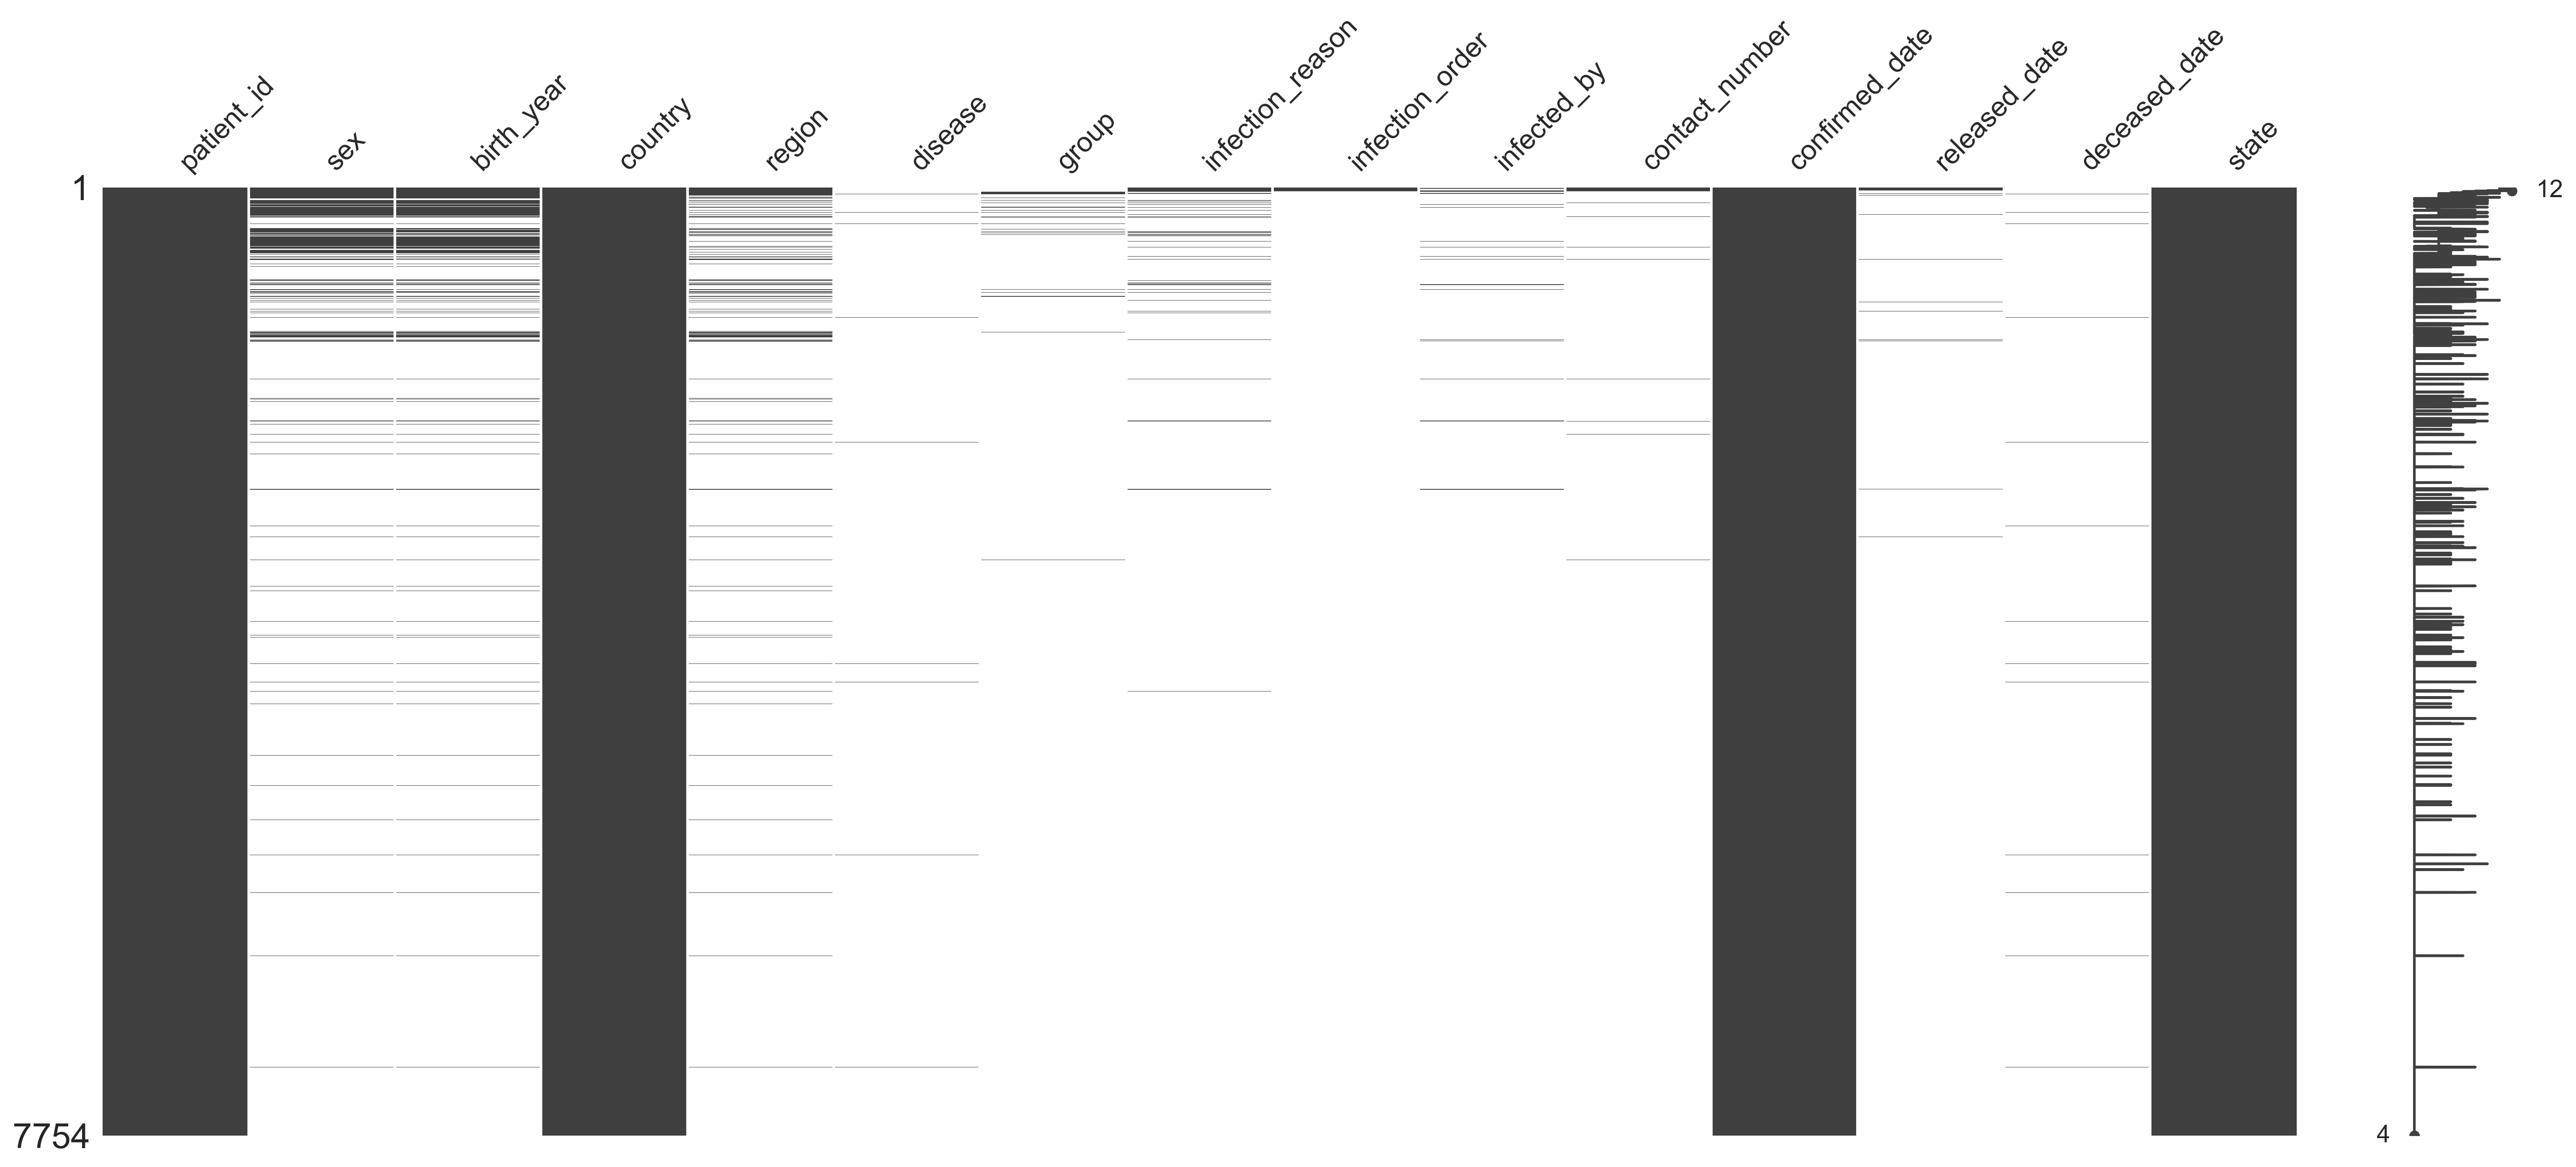

In [9]:
msno.matrix(patient_data)
plt.show()

In [10]:
patient_data['birth_year'].tail()

7749   NaN
7750   NaN
7751   NaN
7752   NaN
7753   NaN
Name: birth_year, dtype: float64

In [11]:
dataframe_birth_year = pd.DataFrame(patient_data['birth_year'])
dataframe_birth_year.columns = ['Missing Value of Birth Year']
dataframe_birth_year

,Missing Value of Birth Year
0,1984.0
1,1964.0
2,1966.0
3,1964.0
4,1987.0
...,...
7749,NaN
7750,NaN
7751,NaN
7752,NaN


In [12]:
patient_data['birth_year'].shape

(7754,)

#### Correlation Matrix

In [13]:
patient_data.corr() 

,patient_id,birth_year,disease,infection_order,infected_by,contact_number
patient_id,1.000000,-0.034847,NaN,0.996446,0.721973,-0.127992
birth_year,-0.034847,1.000000,NaN,-0.028862,0.102124,-0.170023
disease,NaN,NaN,NaN,NaN,NaN,NaN
infection_order,0.996446,-0.028862,NaN,1.000000,0.575657,0.007543
infected_by,0.721973,0.102124,NaN,0.575657,1.000000,0.057415
contact_number,-0.127992,-0.170023,NaN,0.007543,0.057415,1.000000


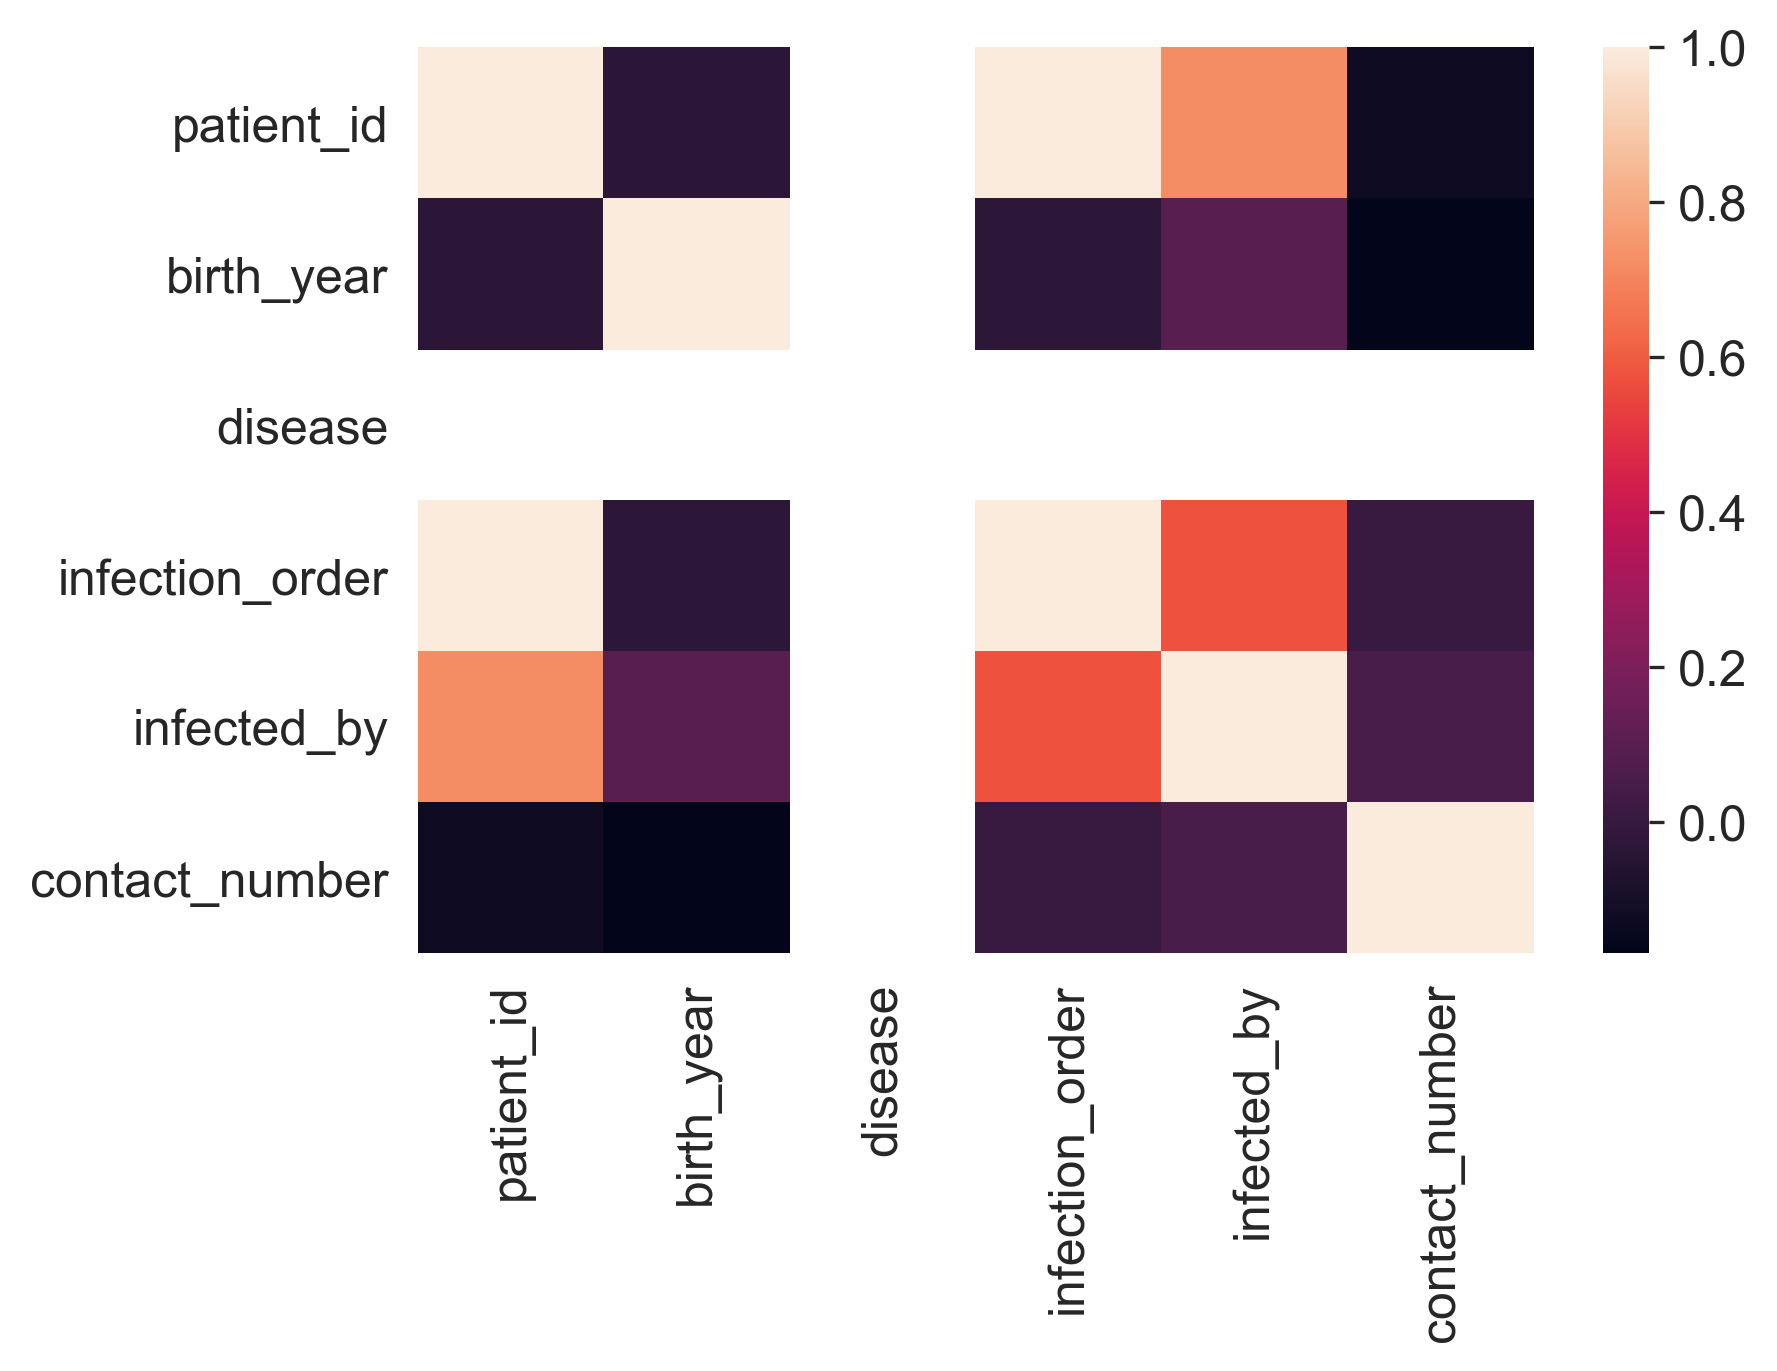

In [14]:
sns.heatmap(data=patient_data.corr())

#### Handling dates

In [15]:
import datetime

In [16]:
now = datetime.datetime.now()

In [17]:
now.year

2020

In [18]:
patient_data['age'] = now.year - patient_data['birth_year']

In [19]:
patient_data['age']

0       36.0
1       56.0
2       54.0
3       56.0
4       33.0
        ... 
7749     NaN
7750     NaN
7751     NaN
7752     NaN
7753     NaN
Name: age, Length: 7754, dtype: float64

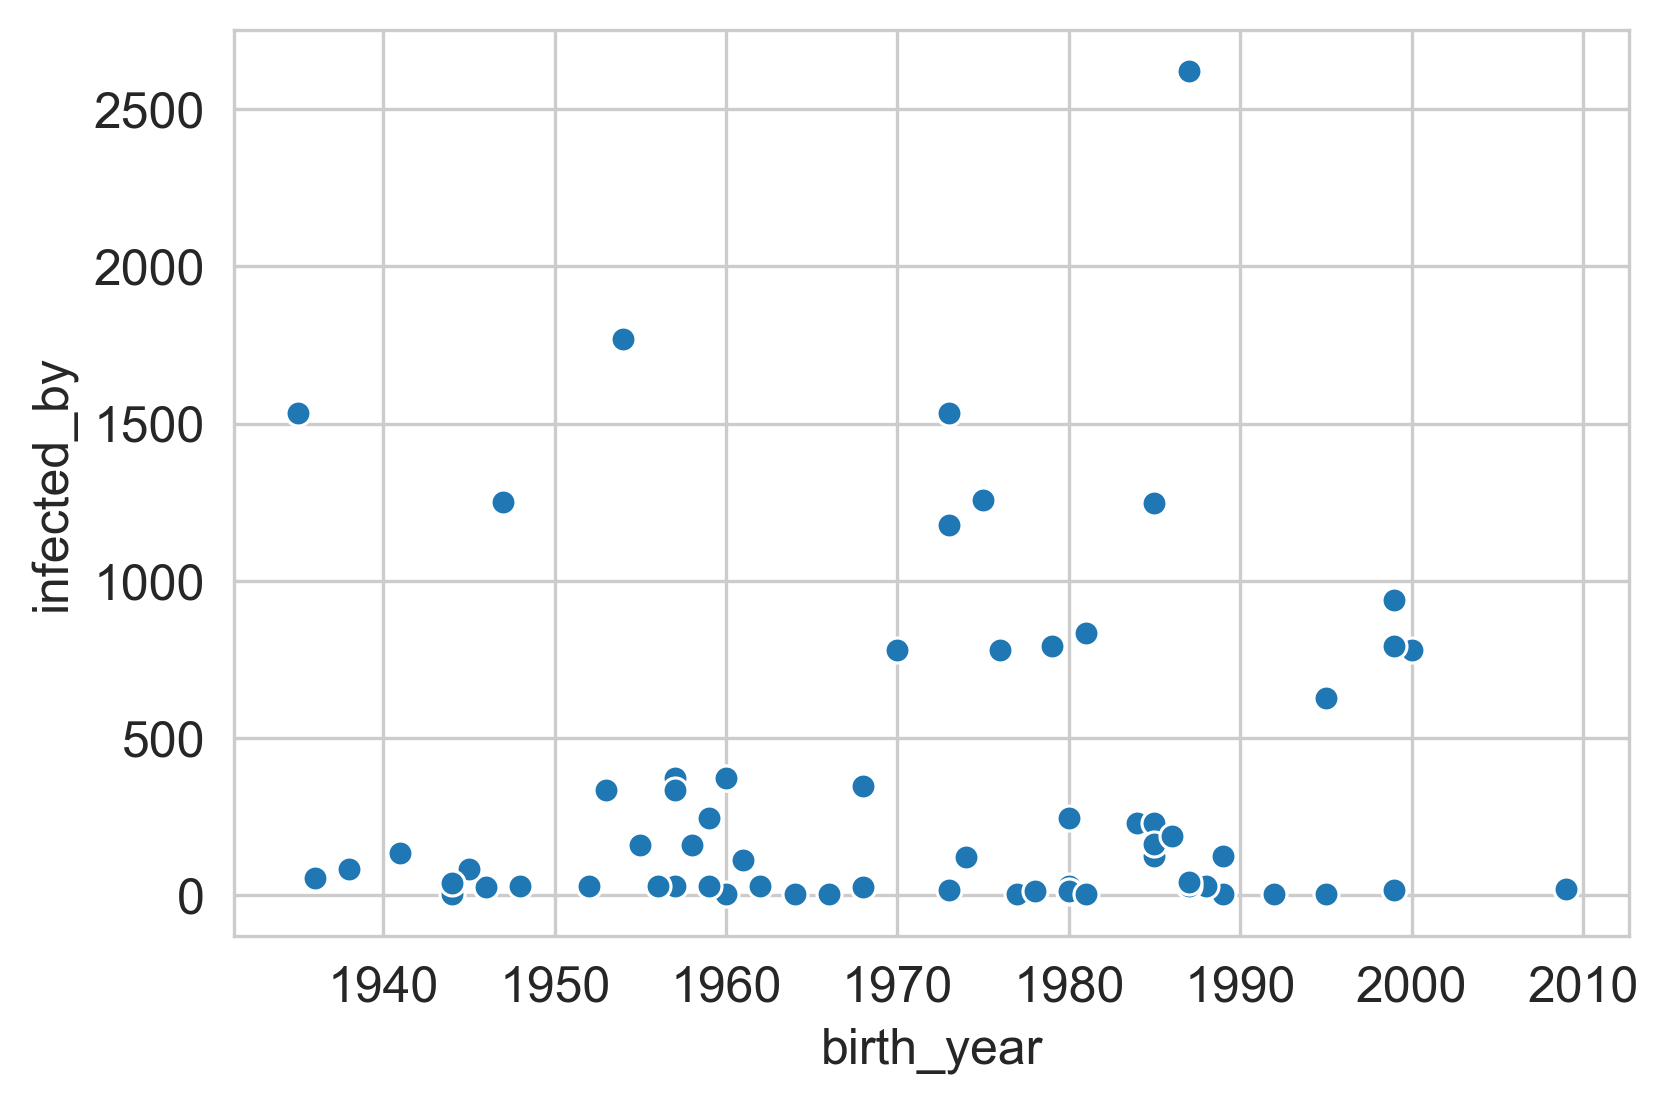

In [20]:
sns.scatterplot(x='birth_year', y='infected_by', data=patient_data)

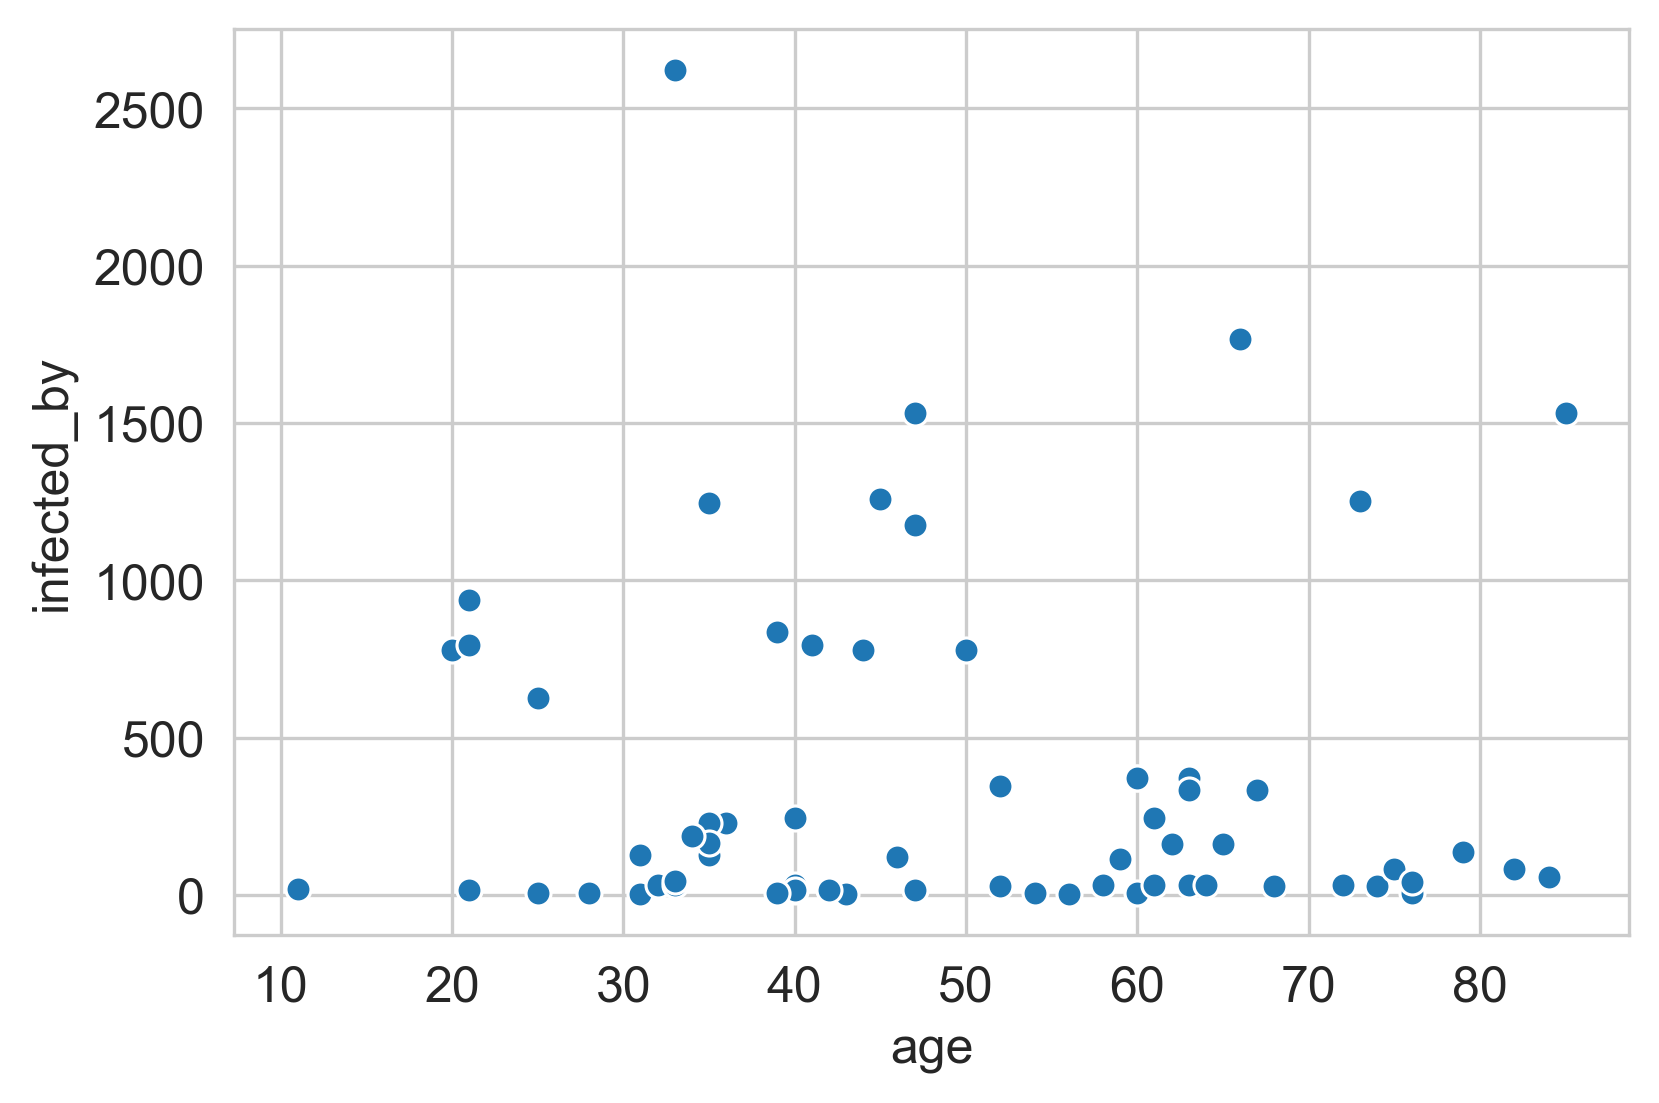

In [21]:
sns.scatterplot(x='age', y='infected_by', data=patient_data)

In [22]:
def group_age(age):
    if age >= 0:
        if age%10 != 0:
            lower = int(math.floor(age/10.0))*10
            upper = int(math.ceil(age/10.0))*10-1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age+9)
            return f"{lower}-{upper}"
        return np.nan

In [23]:
group_age(30) 

'30-39'

In [24]:
patient_data['age_range'] = patient_data['age'].apply(group_age)

In [25]:
age_order = patient_data['age_range'].unique()
age_order

array(['30-39', '50-59', '20-29', '60-69', '40-49', '70-79', '80-89',
       '10-19', None, '0-9', '90-99'], dtype=object)

In [26]:
age_order = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89',
       '90-99']

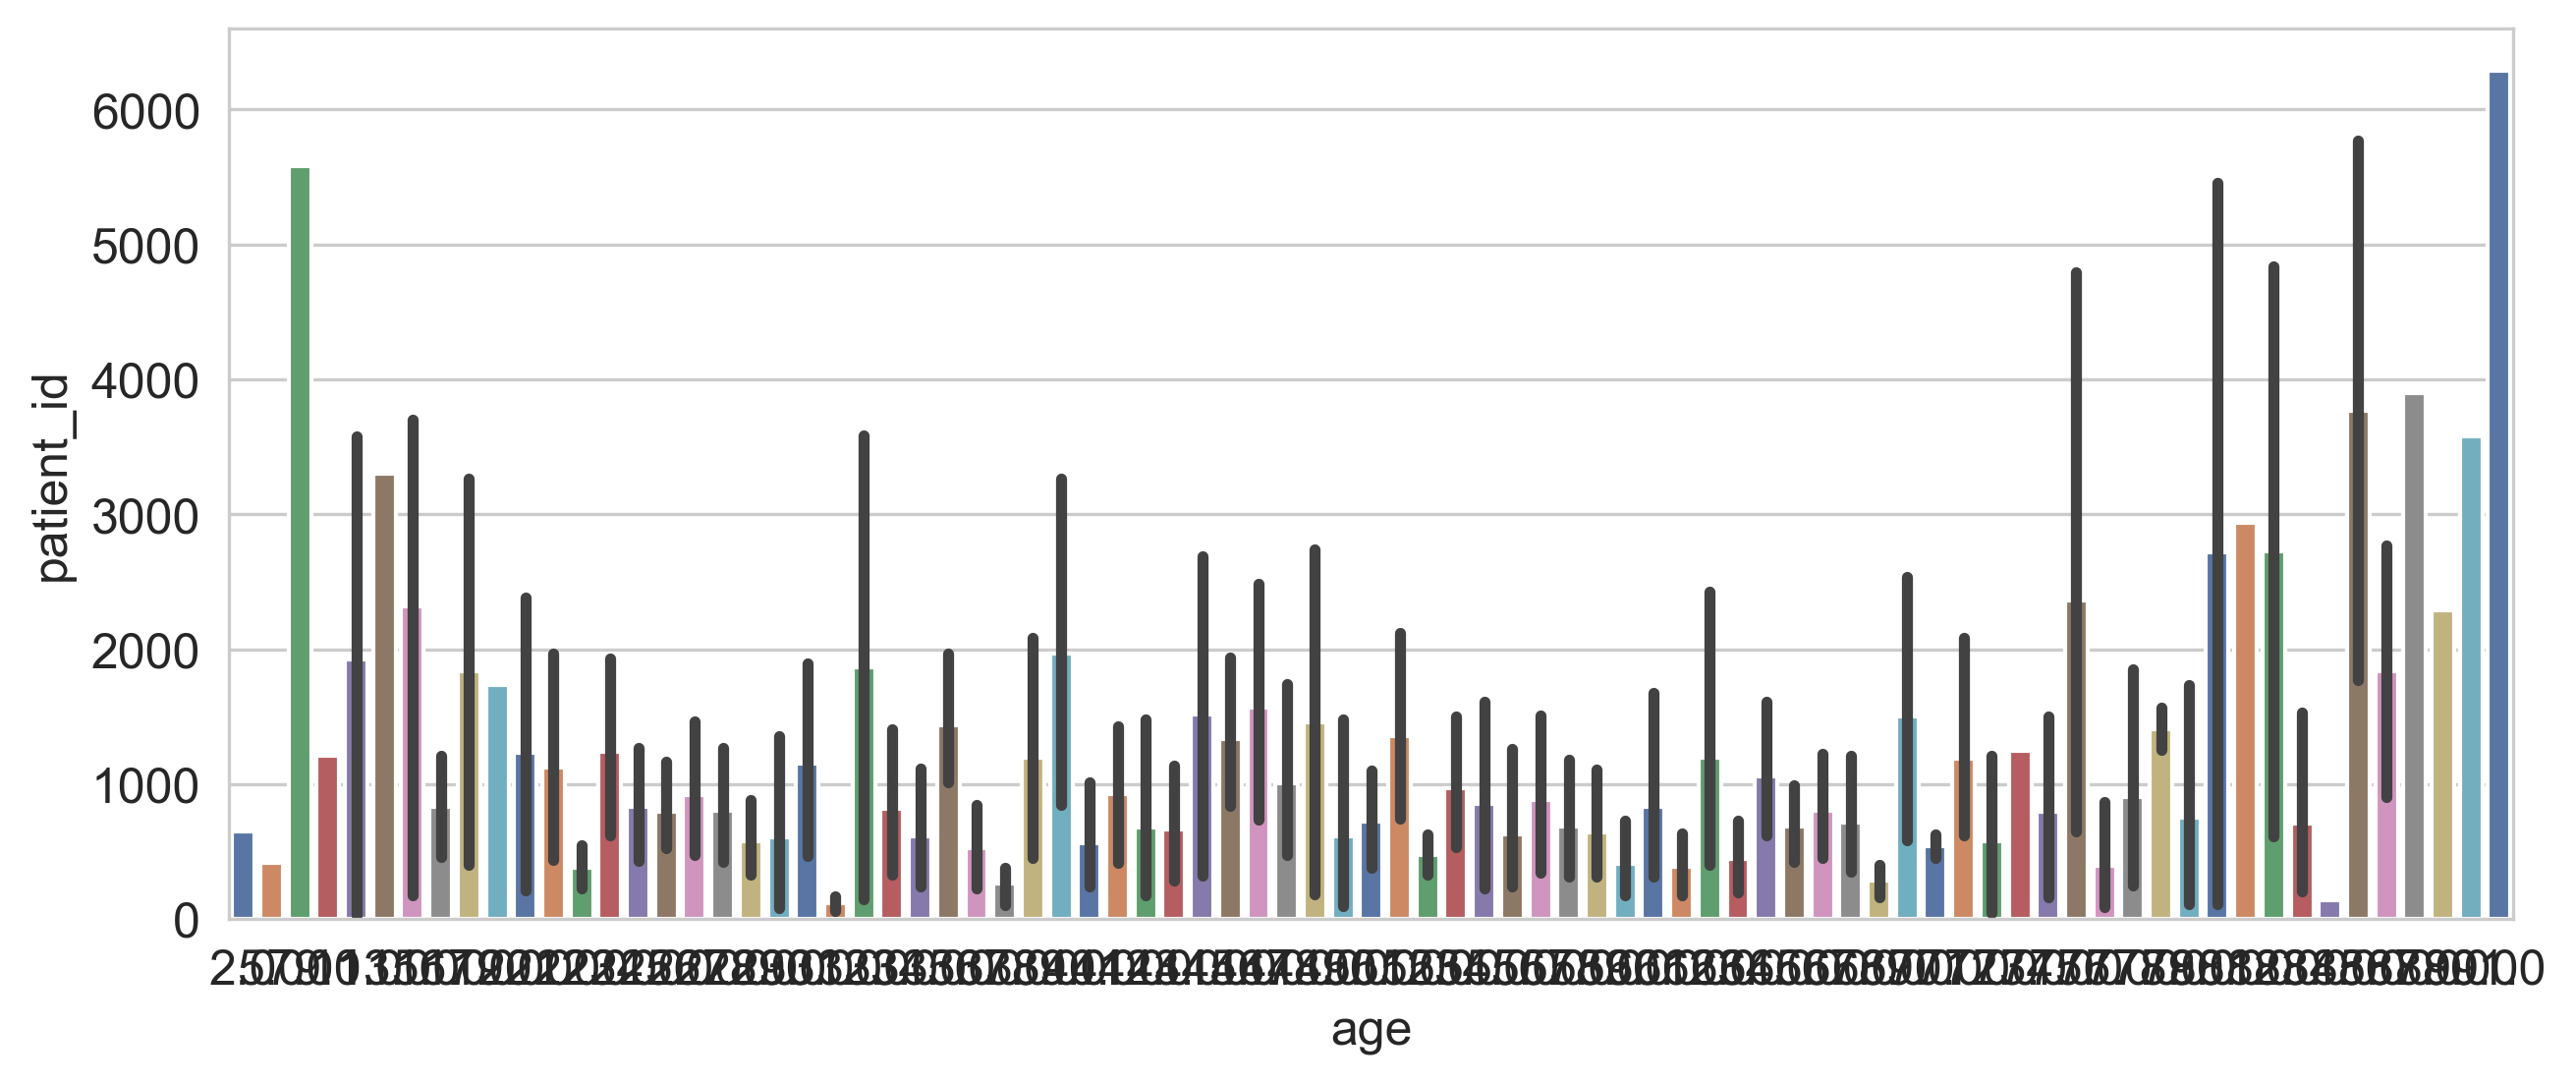

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x='age',y='patient_id', data=patient_data, palette="deep")

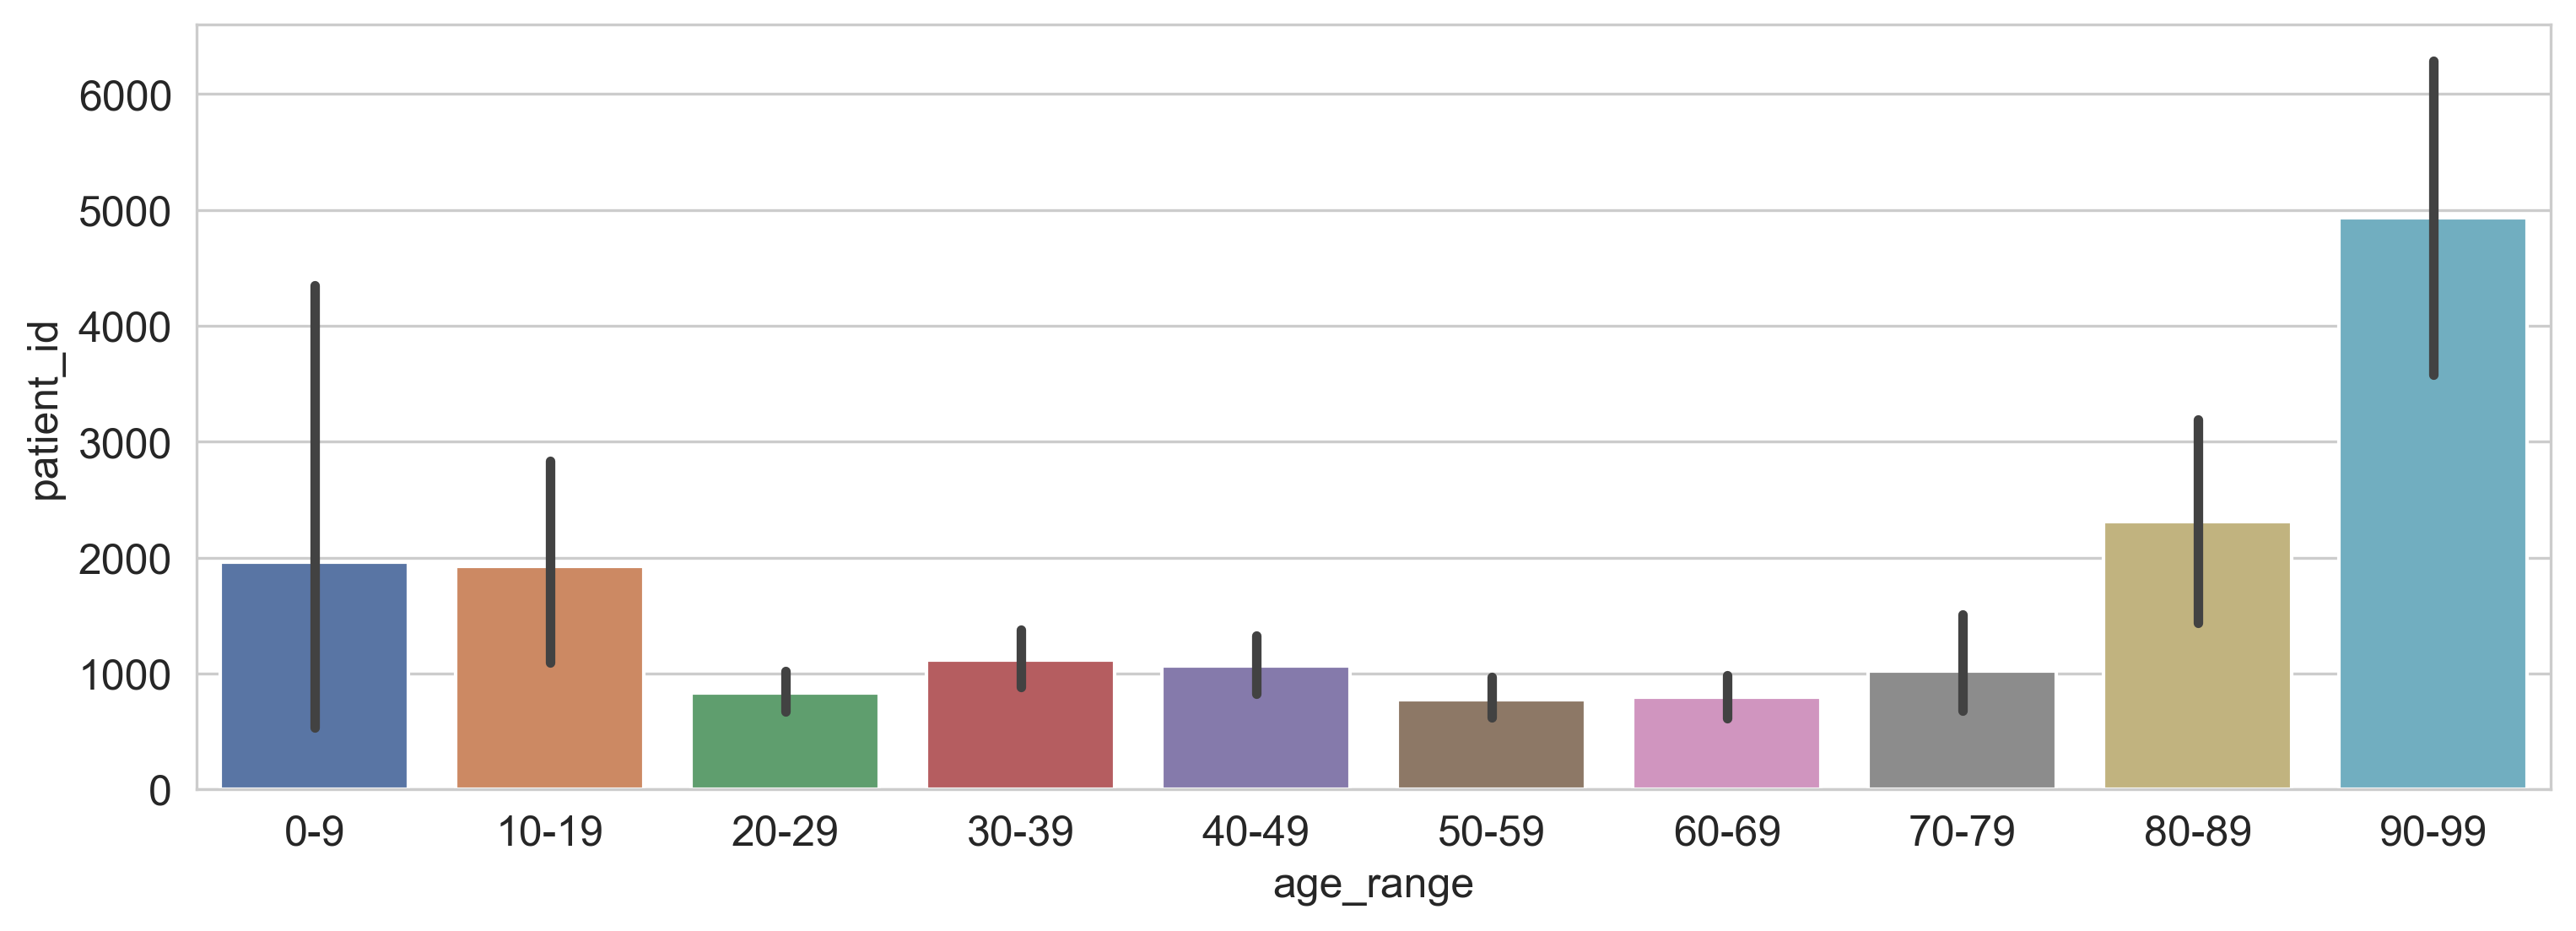

In [28]:
plt.figure(figsize=(12,4))
sns.barplot(x='age_range',y='patient_id',data=patient_data, order=age_order, palette="deep")

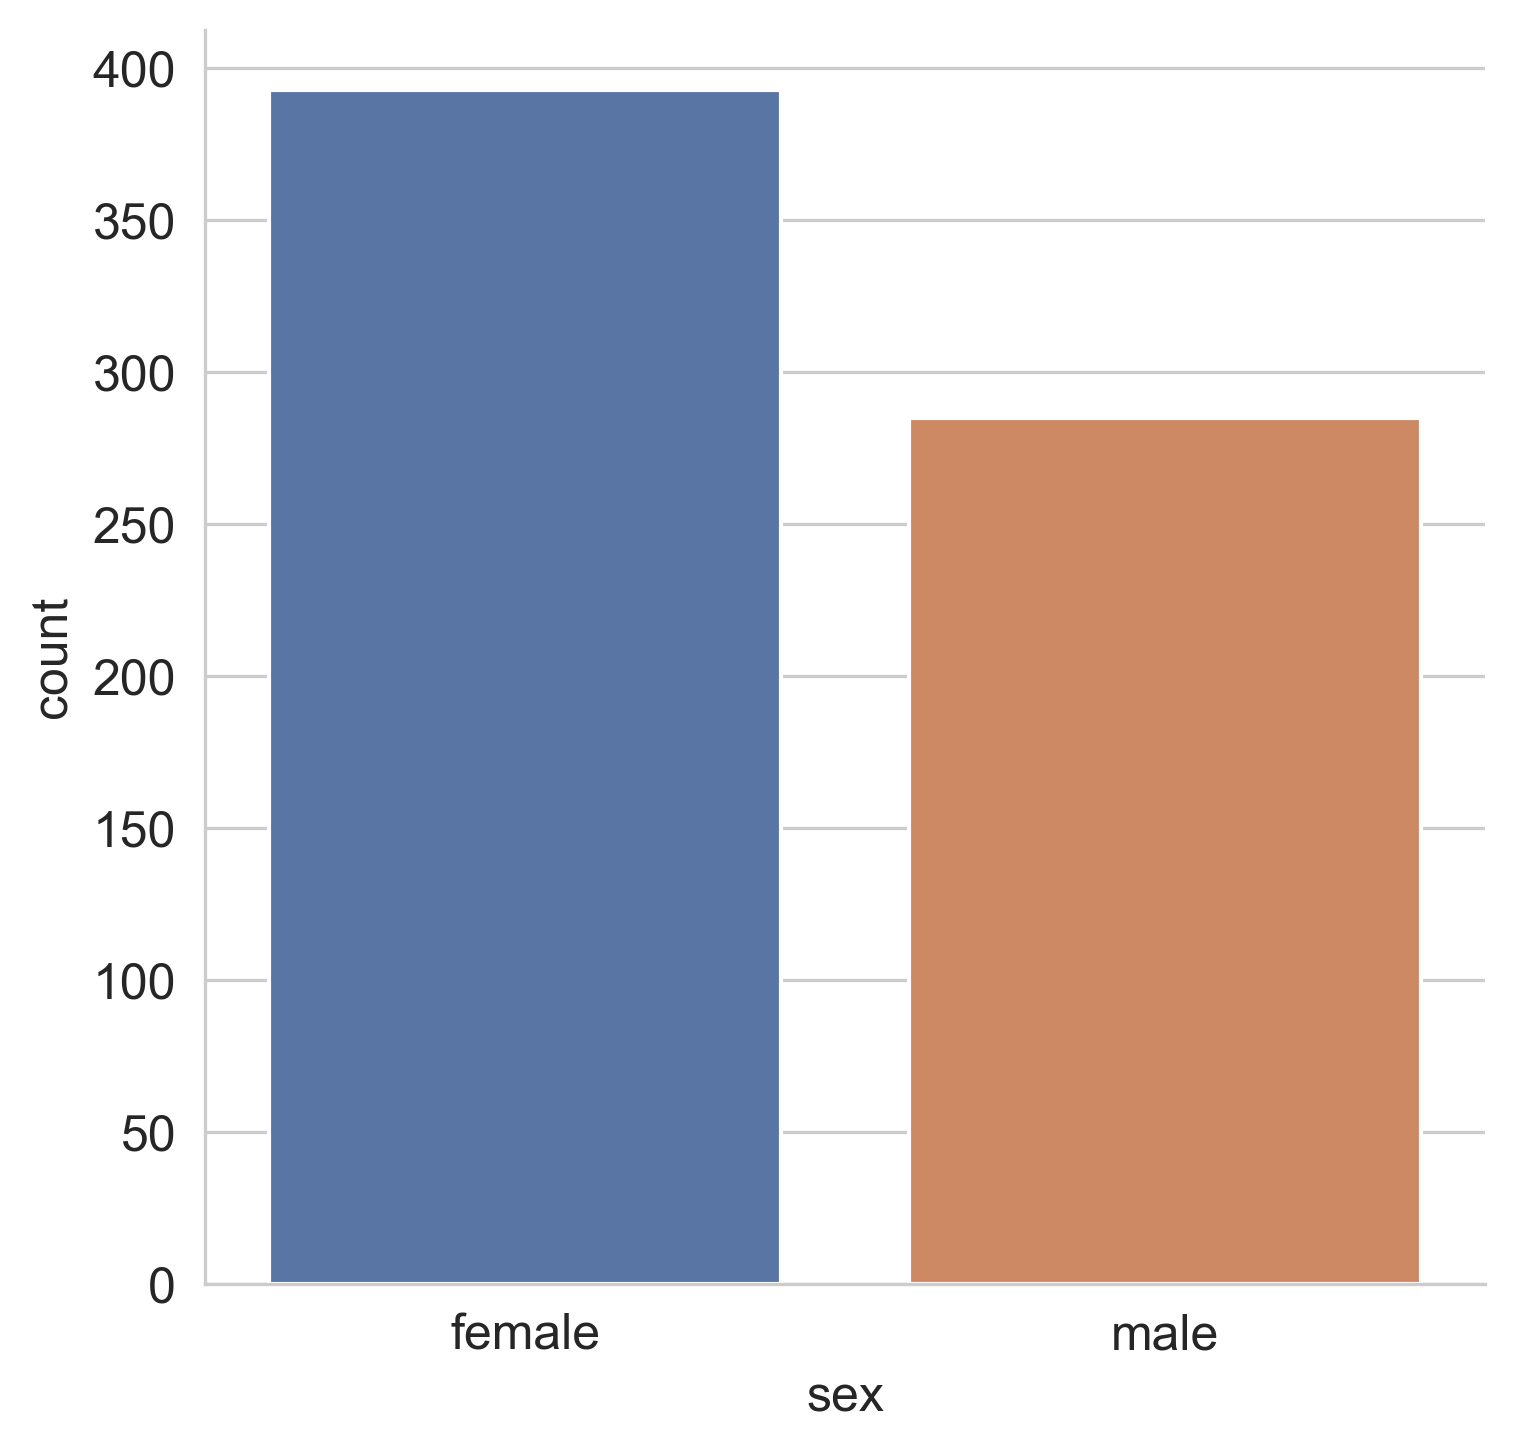

In [29]:
sns.catplot(x='sex', kind='count', data=patient_data, palette="deep")

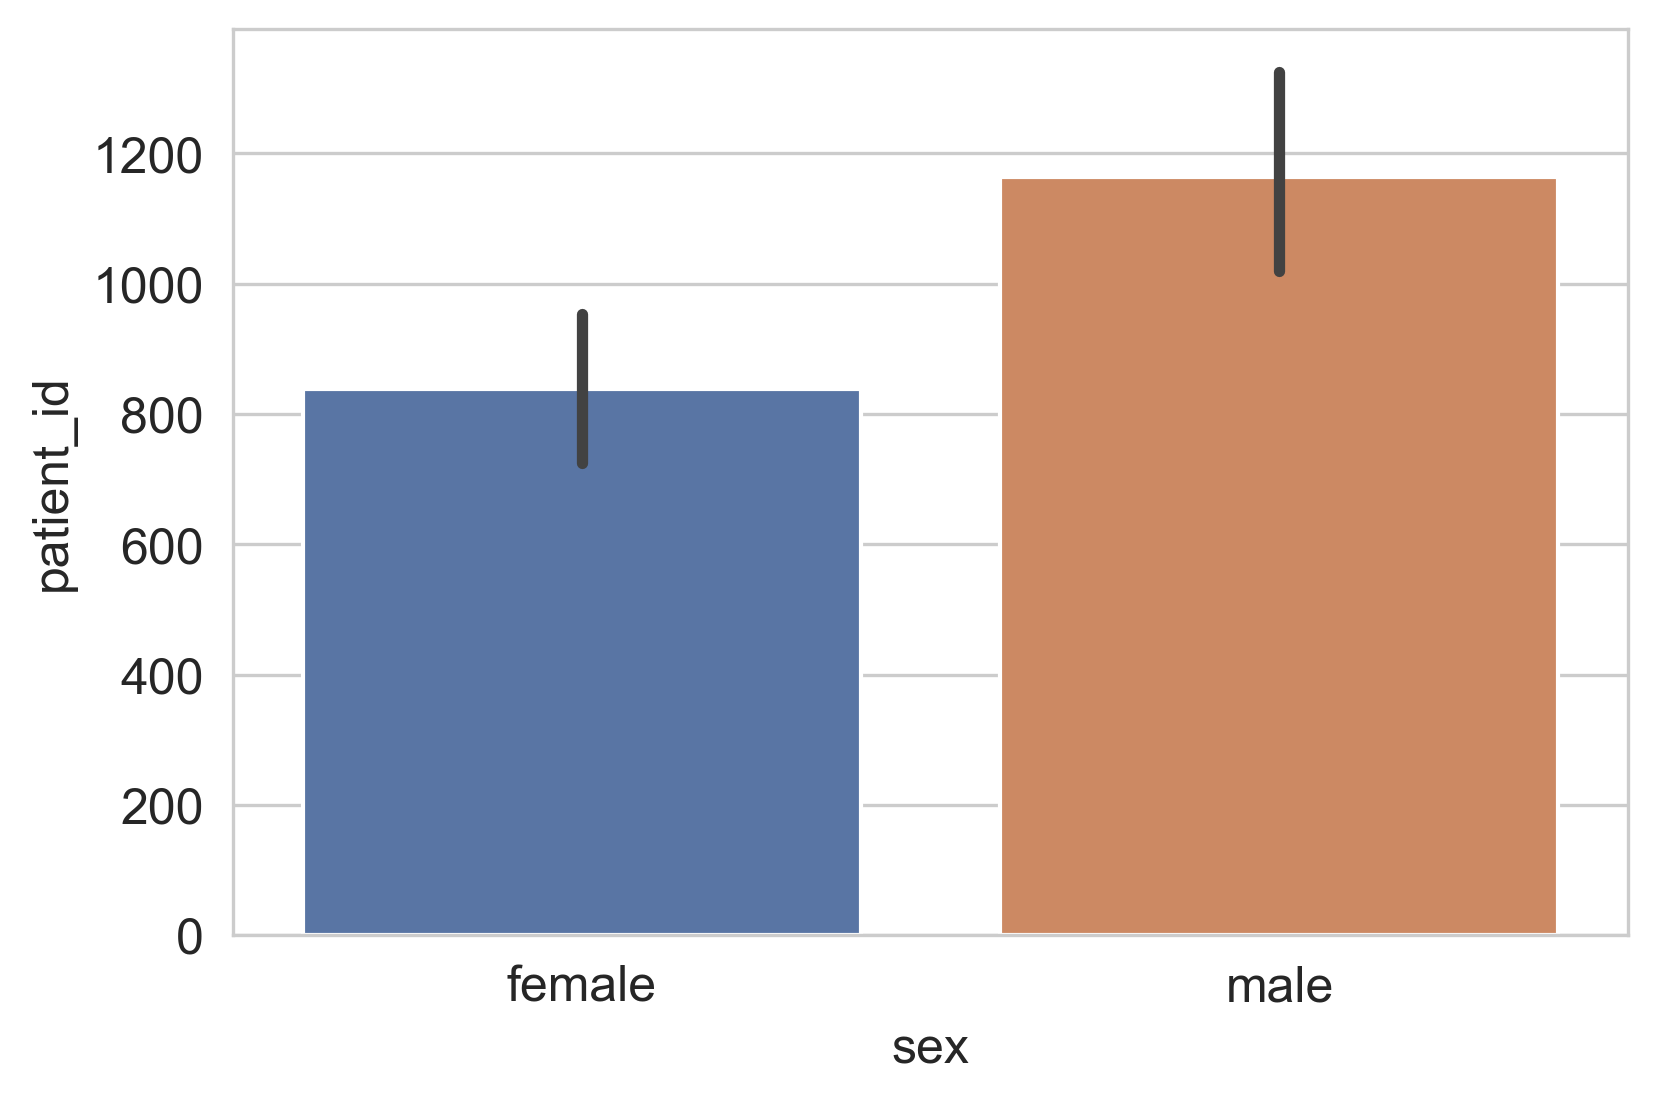

In [30]:
sns.barplot(x='sex', y='patient_id', data=patient_data, palette="deep")

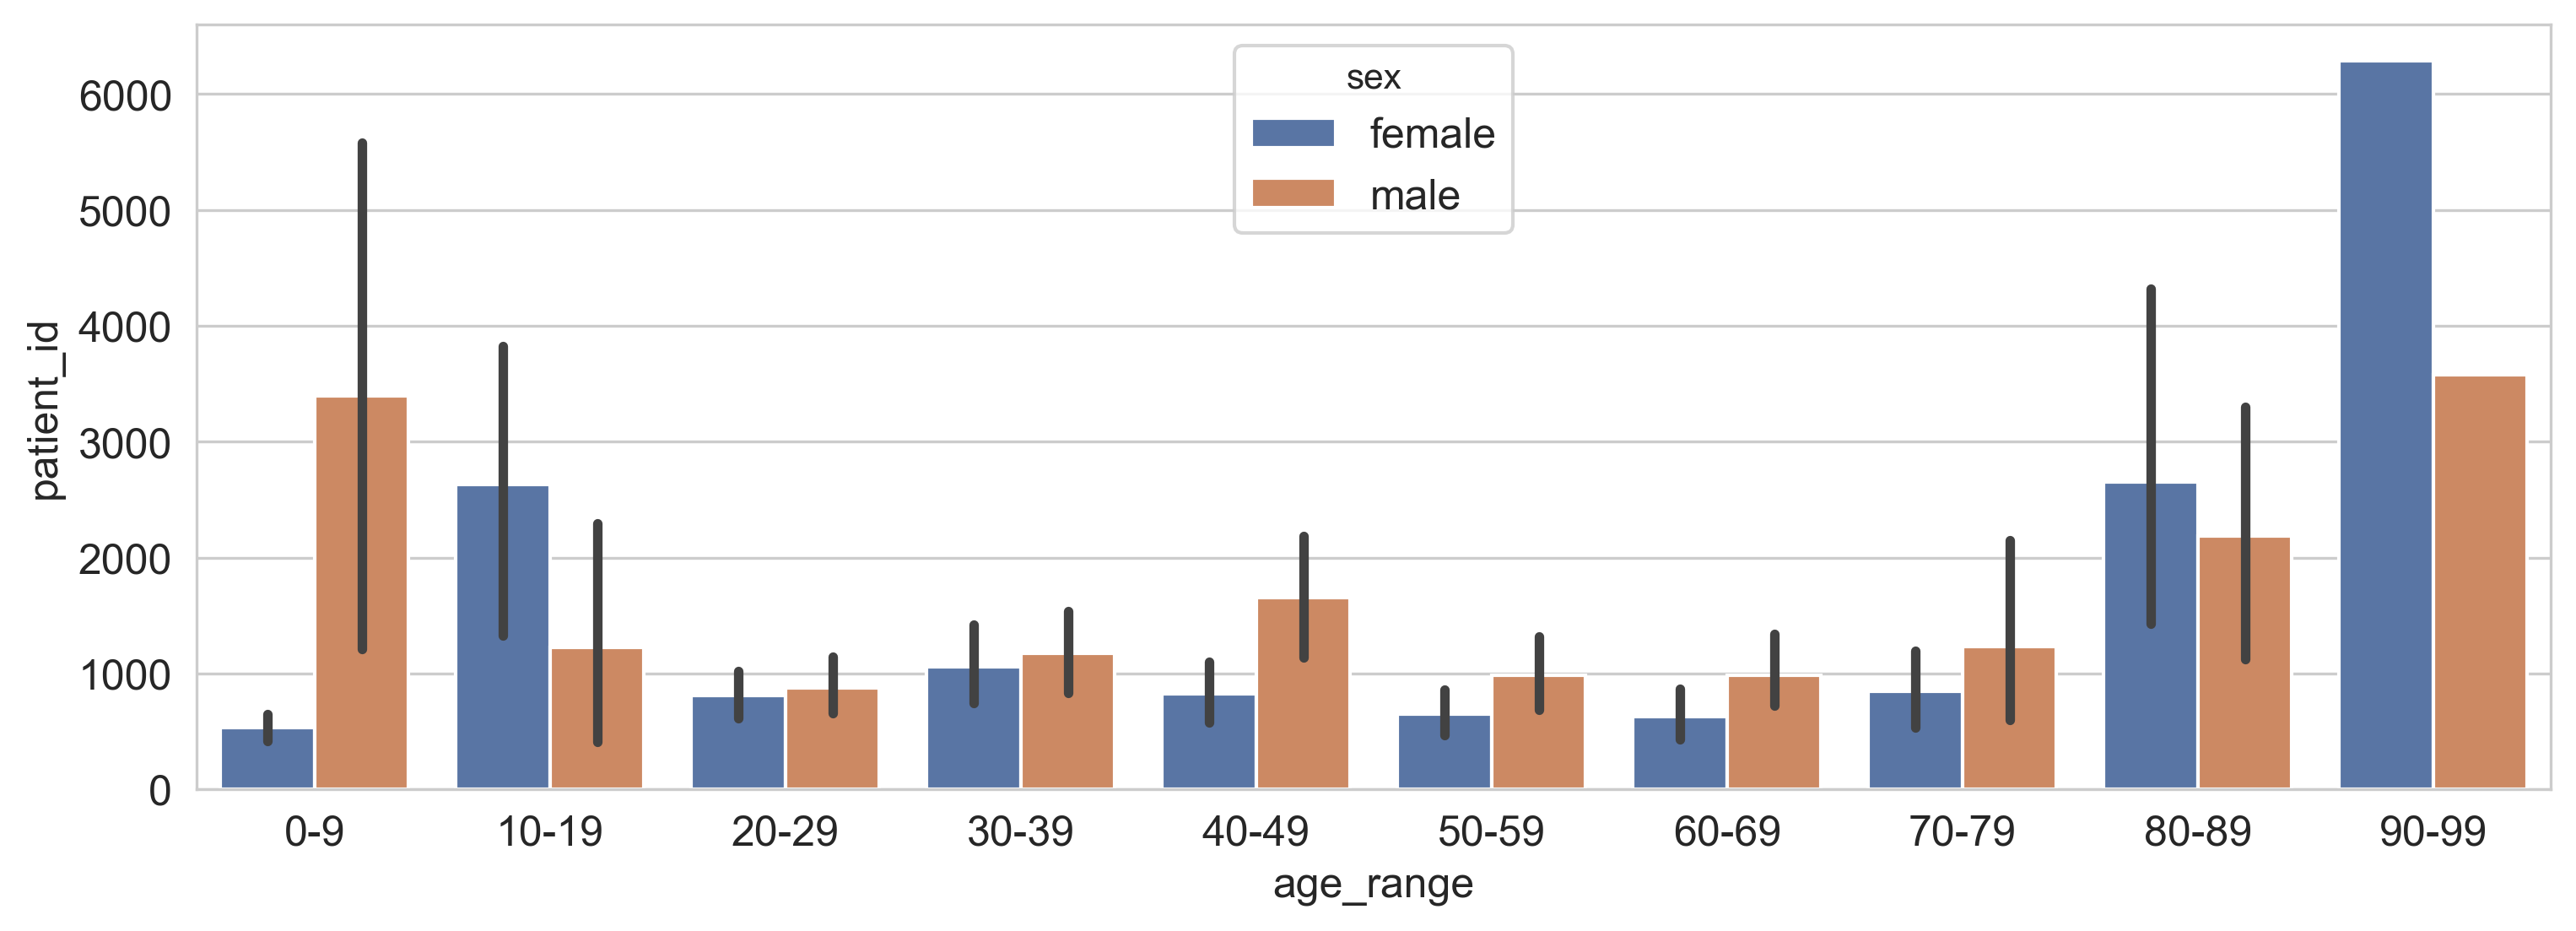

In [31]:
plt.figure(figsize=(12,4))
sns.barplot(x='age_range',y='patient_id', hue='sex', data=patient_data,order=age_order, palette="deep")

In [32]:
patient_data[patient_data['sex'] == 'male'].count()

patient_id          285
sex                 285
birth_year          280
country             285
region              216
disease              21
group                35
infection_reason     79
infection_order      21
infected_by          33
contact_number       29
confirmed_date      285
released_date        28
deceased_date        25
state               285
age                 280
age_range           280
dtype: int64

In [33]:
patient_data[patient_data['sex'] == 'female'].count()

patient_id          393
sex                 393
birth_year          384
country             393
region              214
disease               7
group                49
infection_reason     74
infection_order      15
infected_by          37
contact_number       24
confirmed_date      393
released_date        27
deceased_date        11
state               393
age                 384
age_range           384
dtype: int64

In [34]:
time_data.head()

,date,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,...,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,16,22,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,16,27,25,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [35]:
time_data['confirmed']

0        1
1        1
2        1
3        1
4        2
5        2
6        3
7        4
8        4
9        4
10       6
11      11
12      12
13      15
14      15
15      16
16      18
17      23
18      24
19      24
20      27
21      27
22      28
23      28
24      28
25      28
26      28
27      29
28      30
29      31
30      51
31     104
32     204
33     433
34     602
35     833
36     977
37    1261
38    1766
39    2337
40    3150
41    3736
42    4212
43    4812
44    5328
45    5766
46    6284
47    6767
48    7134
49    7382
50    7513
51    7755
Name: confirmed, dtype: int64

In [36]:
patient = patient_data

In [37]:
column_date = ['confirmed_date','released_date','deceased_date']

In [38]:
for col in column_date:
    patient[col] = pd.to_datetime(patient[col])

In [39]:
patient.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,age_range
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,36.0,30-39
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0,50-59
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0,50-59
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0,50-59
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,33.0,30-39


In [40]:
patient.columns

Index(['patient_id', 'sex', 'birth_year', 'country', 'region', 'disease',
       'group', 'infection_reason', 'infection_order', 'infected_by',
       'contact_number', 'confirmed_date', 'released_date', 'deceased_date',
       'state', 'age', 'age_range'],
      dtype='object')

In [41]:
patient['released_date']

0      2020-02-06
1      2020-02-05
2      2020-02-12
3      2020-02-09
4      2020-03-02
          ...    
7749          NaT
7750          NaT
7751          NaT
7752          NaT
7753          NaT
Name: released_date, Length: 7754, dtype: datetime64[ns]

In [42]:
patient['time_to_release'] = patient['released_date'] - patient['confirmed_date']
patient['time_to_death'] = patient['deceased_date'] - patient['confirmed_date']
patient['duration'] = patient[['time_to_release','time_to_death']].min(axis=1)
patient['duration_days'] = patient['duration'].dt.days

In [43]:
range_of_age = sorted(set([ar for ar in patient['age_range'] if ar != None]))

In [44]:
patient['state_by_gender'] = patient['state'] + '_' + patient['sex']

In [45]:
infection_reason = ['visit to Wuhan', 'contact with patient',
       'contact with patient in Japan', 'residence in Wuhan',
       'visit to Thailand', 'contact with patient in Singapore',
       'visit to China', 'visit to Daegu', 'pilgrimage to Israel',
       'contact with patient in Daegu', 'visit to Vietnam',
       'visit to Japan', 'visit to Italy', 'visit to ooo']

In [46]:
numerical_infection = []

for i in infection_reason:
    numeric = patient_data[patient_data['infection_reason'] == i]['patient_id'].count()
    numerical_infection.append(numeric)
    
numerical_infection

[8, 76, 1, 2, 2, 2, 2, 50, 6, 1, 1, 1, 1, 1]

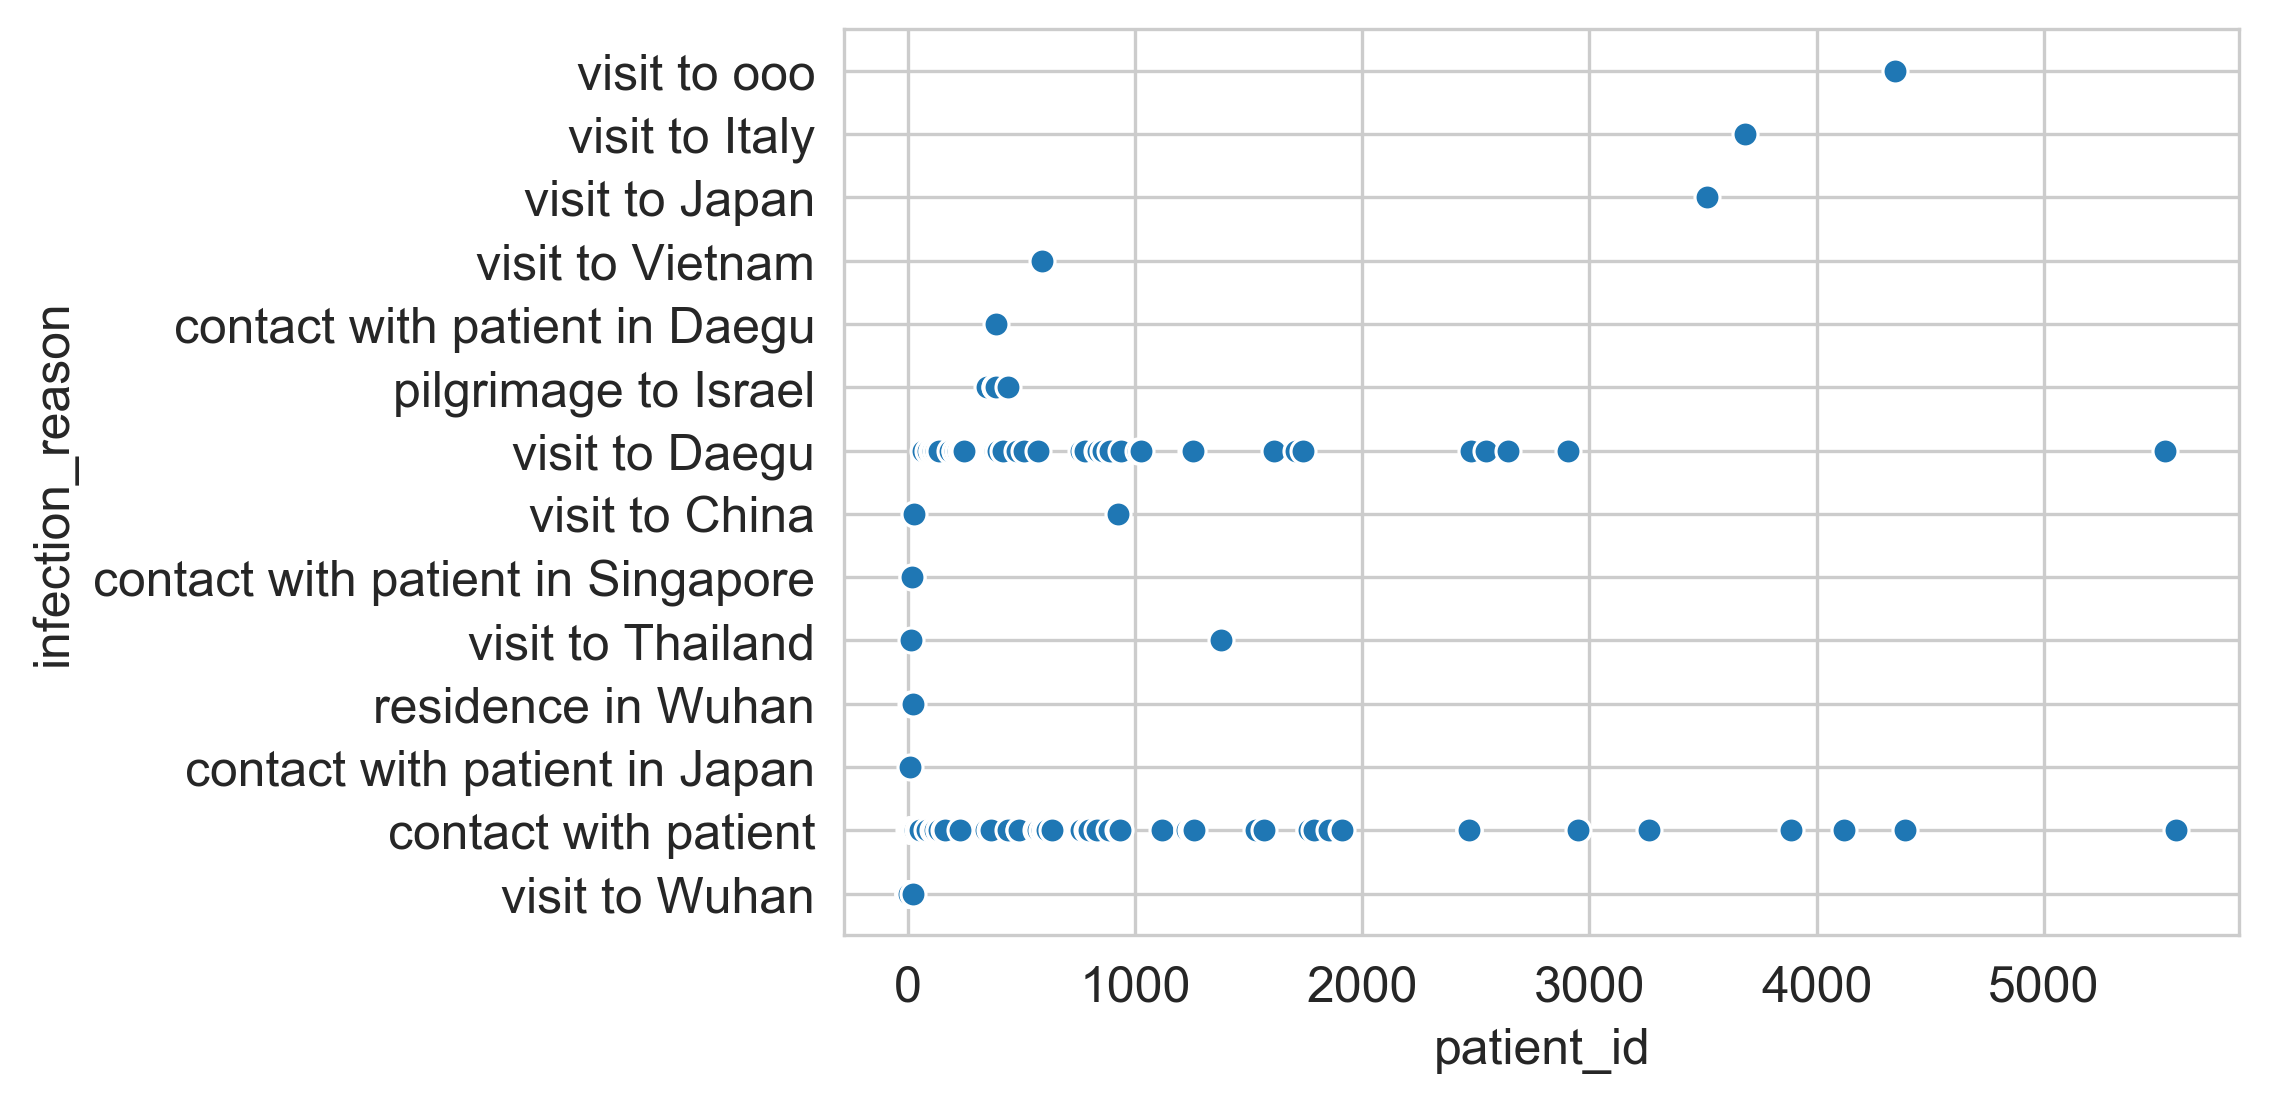

In [47]:
sns.scatterplot(x='patient_id', y='infection_reason', data=patient_data, palette="deep")

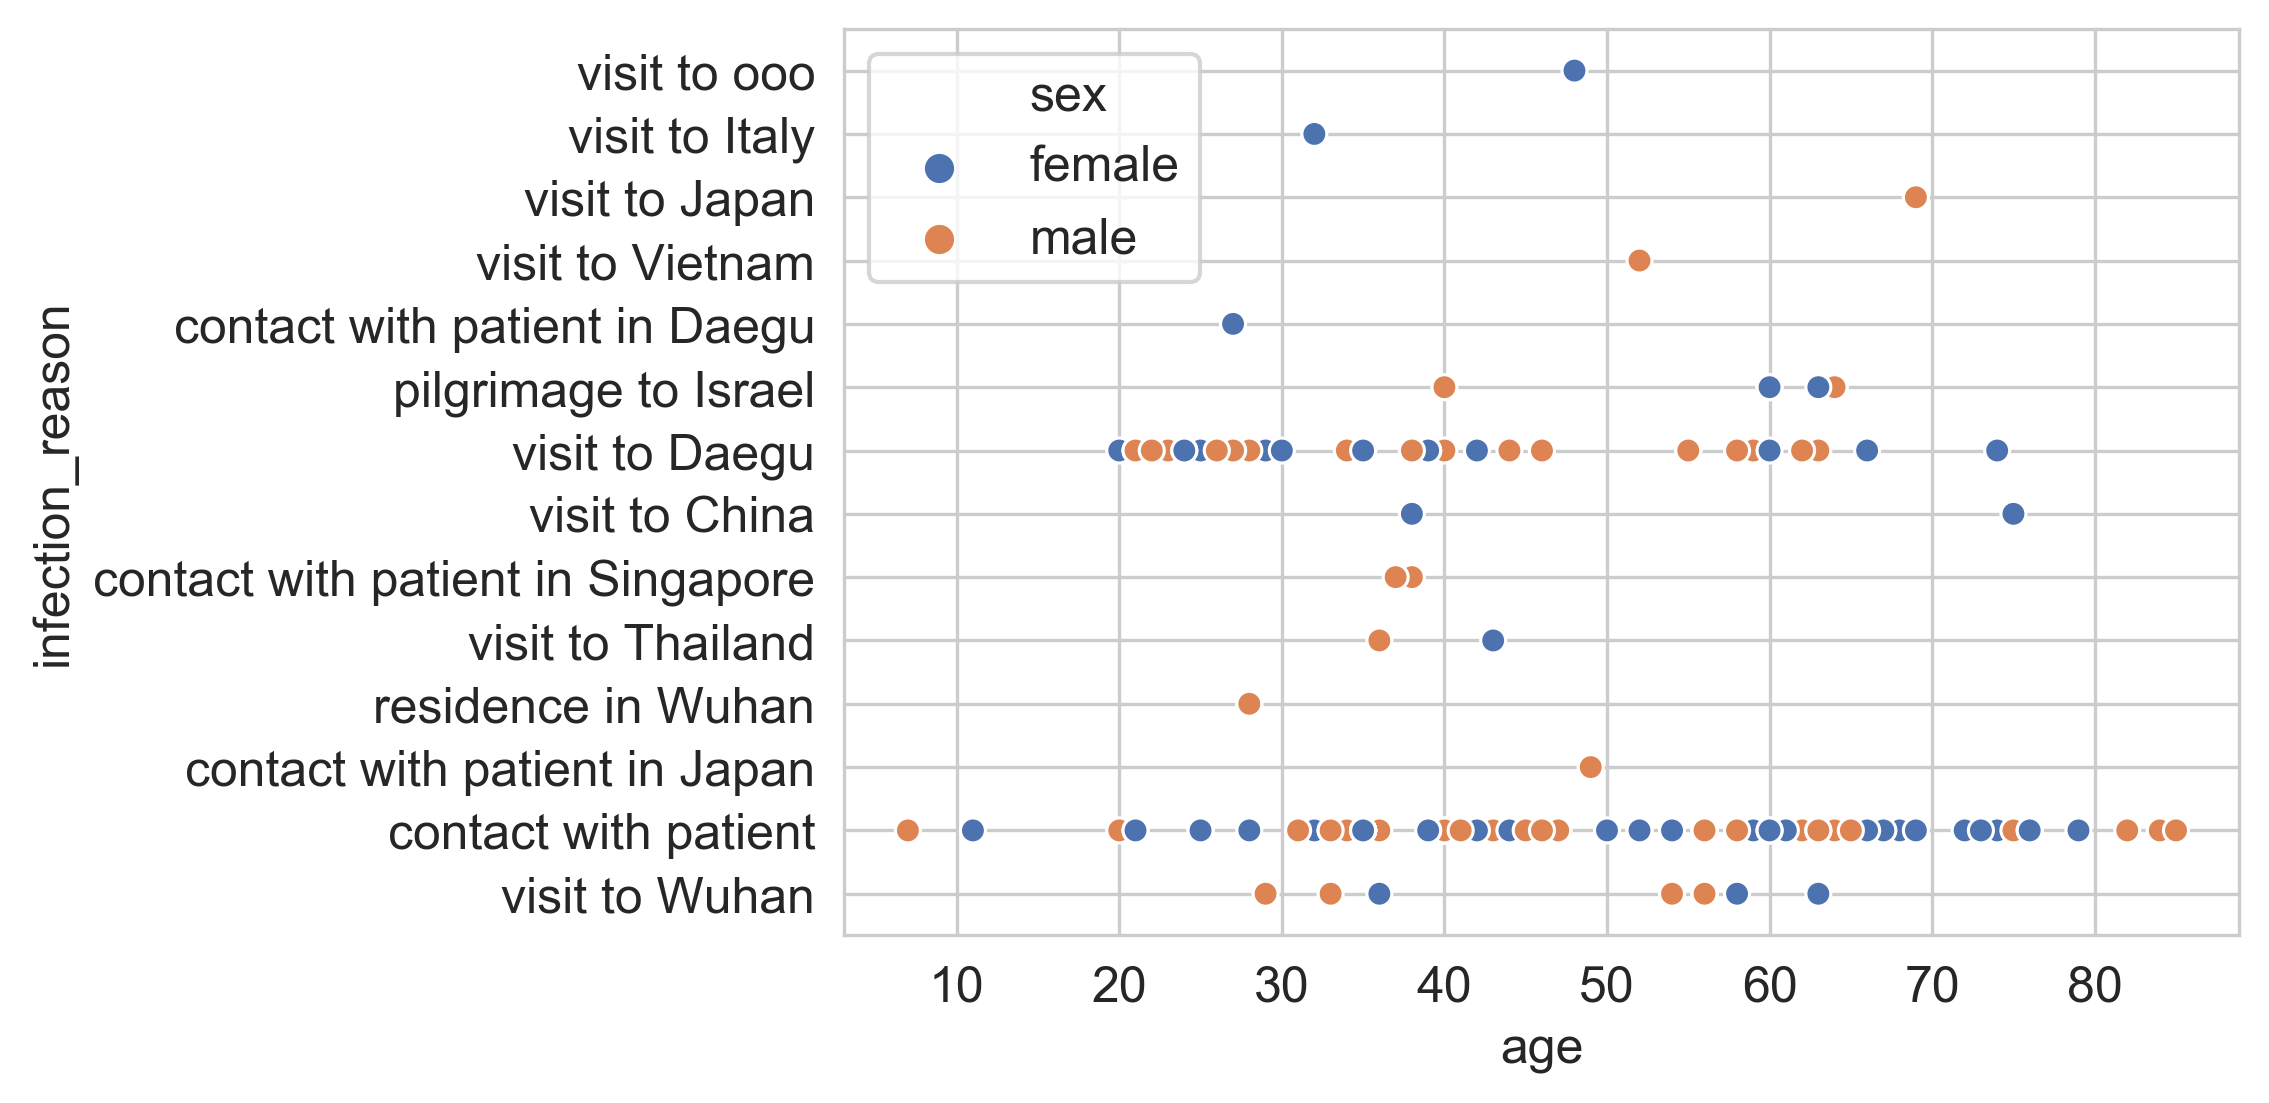

In [48]:
sns.scatterplot(x='age', y='infection_reason', hue='sex', data=patient_data, palette="deep")

In [49]:
infection_reason = patient_data['infection_reason'].dropna().unique()
infection_reason 

array(['visit to Wuhan', 'contact with patient',
       'contact with patient in Japan', 'residence in Wuhan',
       'visit to Thailand', 'contact with patient in Singapore',
       'visit to China', 'visit to Daegu', 'pilgrimage to Israel',
       'contact with patient in Daegu', 'visit to Vietnam',
       'visit to Japan', 'visit to Italy', 'visit to ooo'], dtype=object)

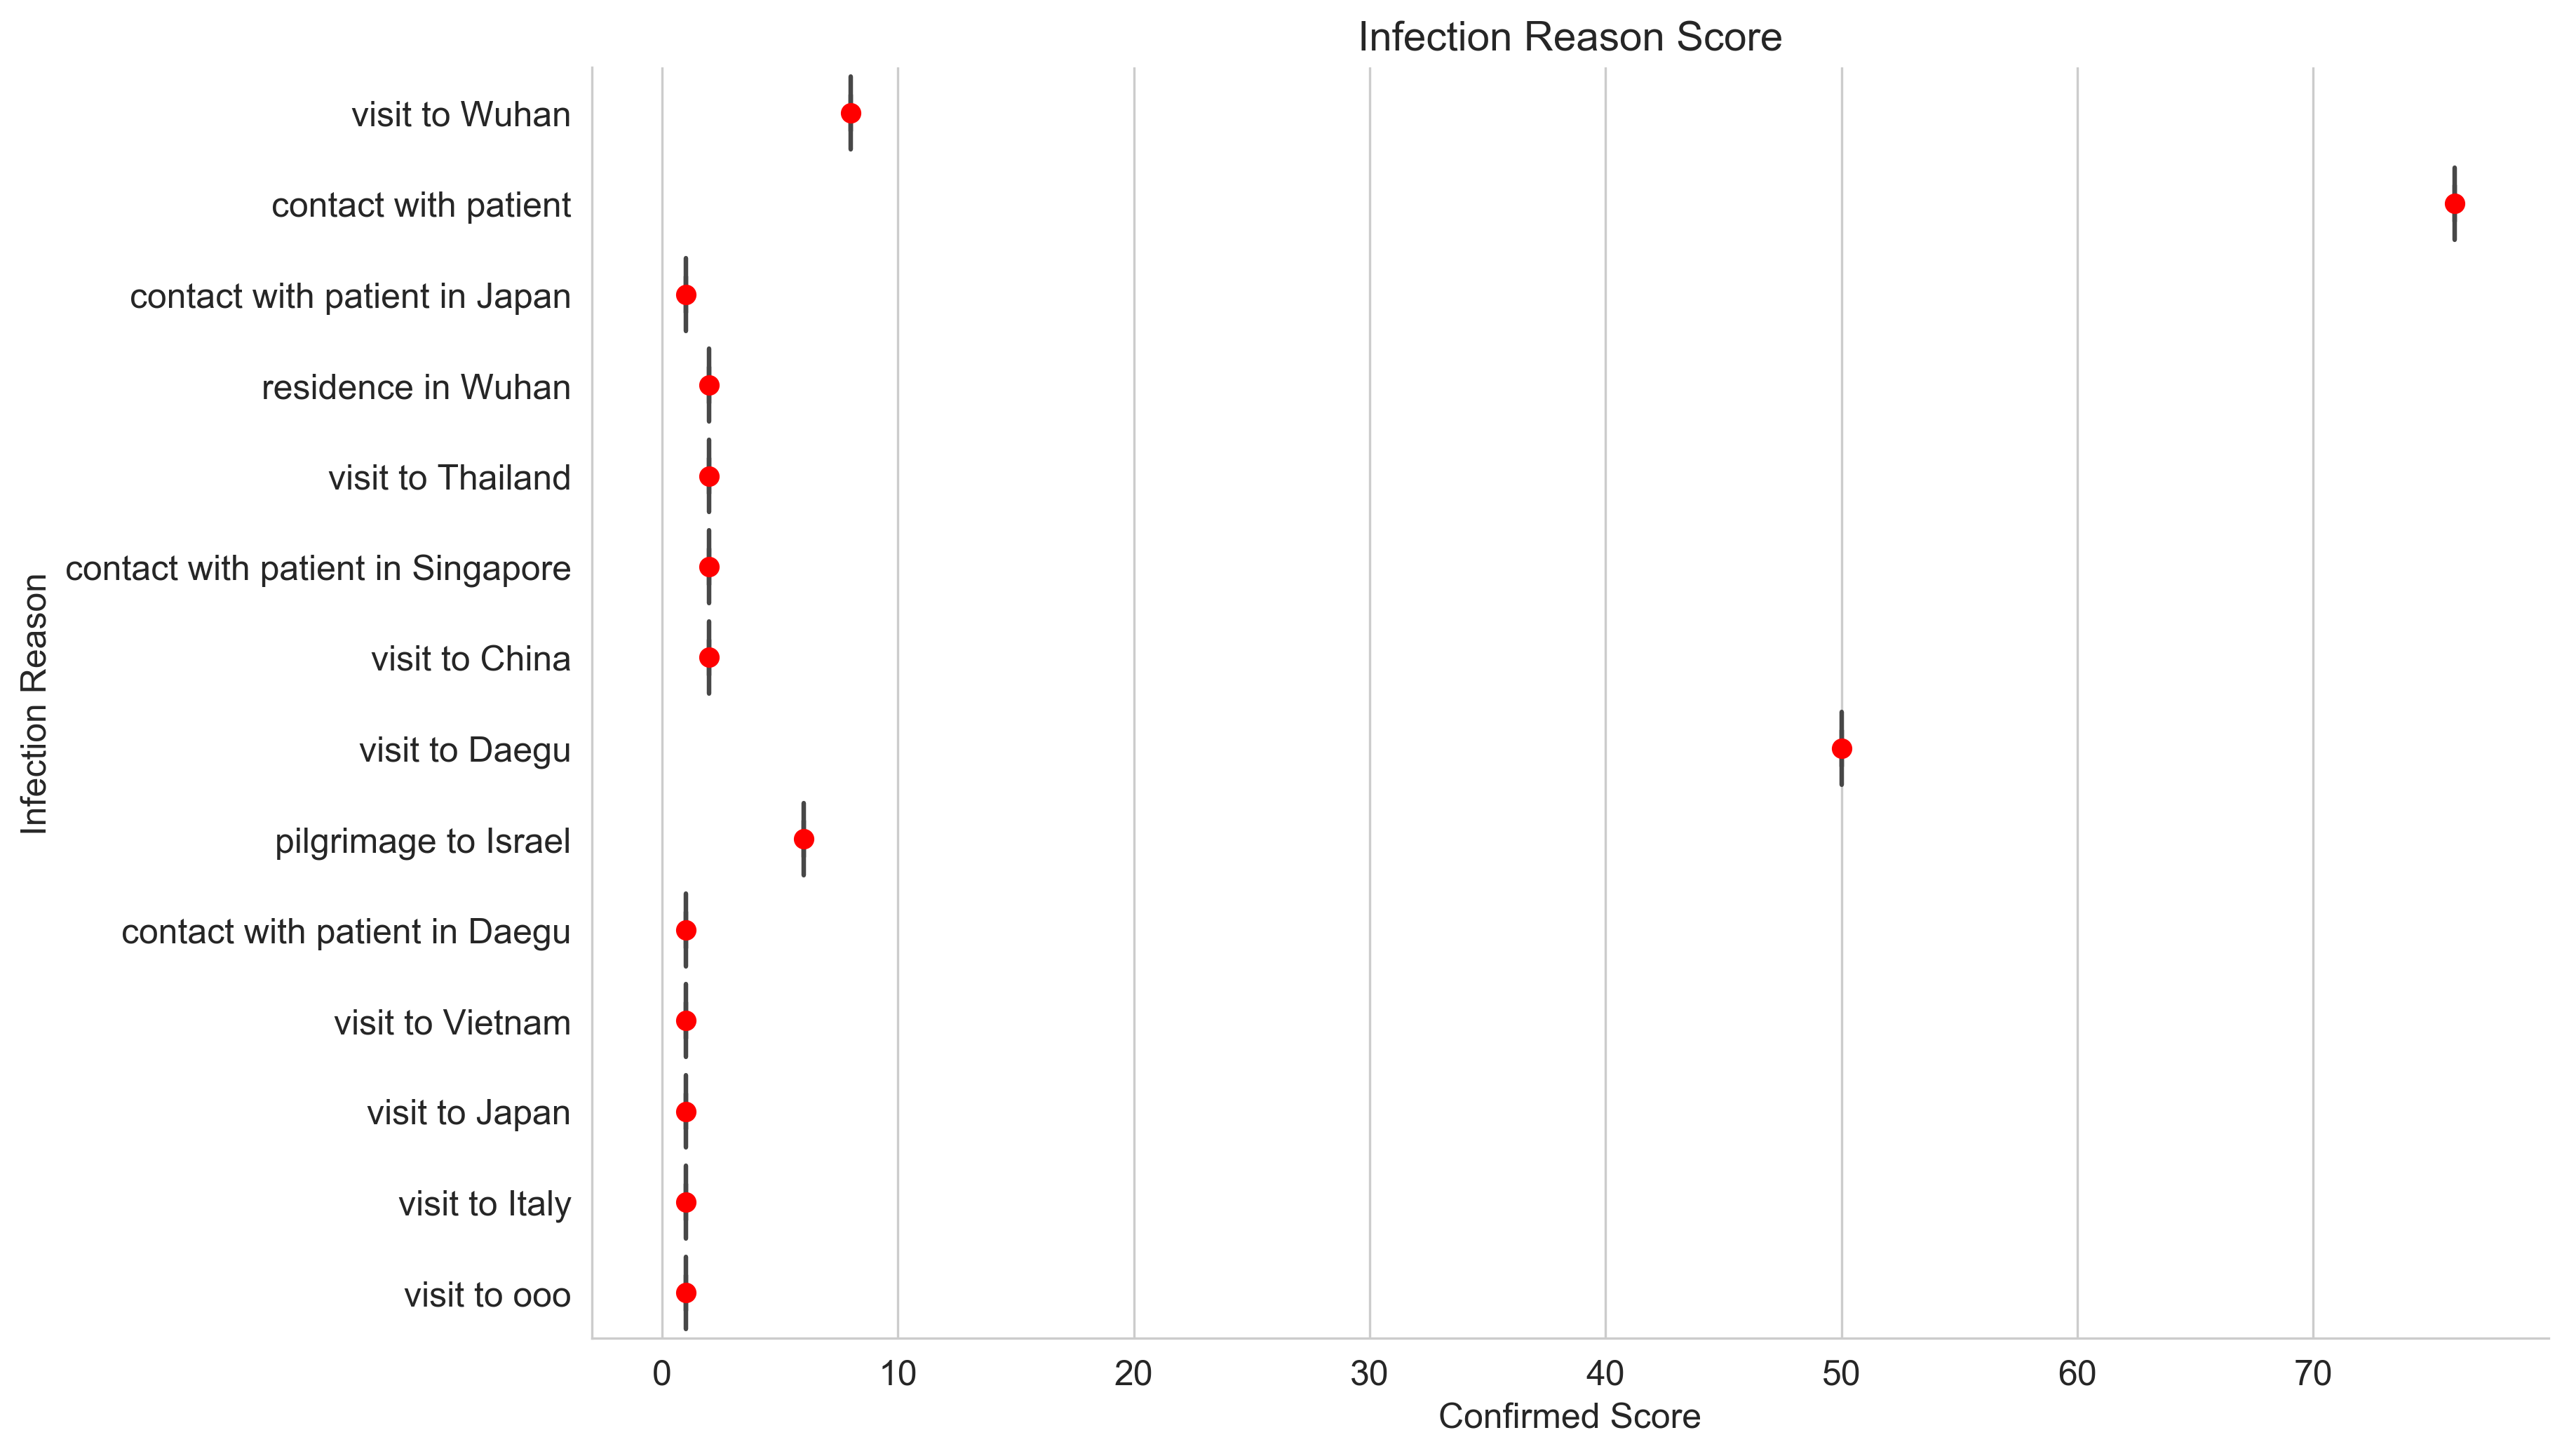

In [50]:
g = sns.boxplot(x=numerical_infection, y=infection_reason, whis=np.inf)
g = sns.swarmplot(x=numerical_infection, y=infection_reason, size = 7, color = 'red')
              
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.title('Infection Reason Score')
plt.xlabel('Confirmed Score')
plt.ylabel('Infection Reason')
plt.show()

In [51]:
released = patient_data[patient_data.state == 'released']
isolated = patient_data[patient_data.state == 'isolated']
dead = patient_data[patient_data.state == 'deceased']

#### Feature Selection

In [52]:
patient_data['patient_id']

0          1
1          2
2          3
3          4
4          5
        ... 
7749    7751
7750    7752
7751    7753
7752    7754
7753    7755
Name: patient_id, Length: 7754, dtype: int64

In [53]:
patient_data['patient_id'].isna().values.any() 

False

In [54]:
patient_data['confirmed_date']

0      2020-01-20
1      2020-01-24
2      2020-01-26
3      2020-01-27
4      2020-01-30
          ...    
7749   2020-03-10
7750   2020-03-10
7751   2020-03-10
7752   2020-03-10
7753   2020-03-10
Name: confirmed_date, Length: 7754, dtype: datetime64[ns]

In [55]:
patient_data.confirmed_date = pd.to_datetime(patient_data.confirmed_date)

In [56]:
patient_data.confirmed_date

0      2020-01-20
1      2020-01-24
2      2020-01-26
3      2020-01-27
4      2020-01-30
          ...    
7749   2020-03-10
7750   2020-03-10
7751   2020-03-10
7752   2020-03-10
7753   2020-03-10
Name: confirmed_date, Length: 7754, dtype: datetime64[ns]

#### Groupby Output Format

In [57]:
count_id = patient_data.groupby(patient_data.confirmed_date).patient_id.count()

In [58]:
count_id

confirmed_date
2020-01-20       1
2020-01-24       1
2020-01-26       1
2020-01-27       1
2020-01-30       3
2020-01-31       4
2020-02-01       1
2020-02-02       3
2020-02-04       1
2020-02-05       5
2020-02-06       3
2020-02-09       3
2020-02-10       1
2020-02-16       2
2020-02-18       8
2020-02-19      27
2020-02-20      38
2020-02-21     100
2020-02-22     229
2020-02-23     169
2020-02-24     231
2020-02-25     143
2020-02-26     287
2020-02-27     504
2020-02-28     571
2020-02-29     812
2020-03-01    1062
2020-03-02     600
2020-03-03     516
2020-03-04     438
2020-03-05     518
2020-03-06     483
2020-03-07     367
2020-03-08     248
2020-03-09     131
2020-03-10     242
Name: patient_id, dtype: int64

In [59]:
count_id.head()

confirmed_date
2020-01-20    1
2020-01-24    1
2020-01-26    1
2020-01-27    1
2020-01-30    3
Name: patient_id, dtype: int64

In [60]:
count_id.tail()

confirmed_date
2020-03-06    483
2020-03-07    367
2020-03-08    248
2020-03-09    131
2020-03-10    242
Name: patient_id, dtype: int64

In [61]:
accumulated_count = count_id.cumsum()

In [62]:
accumulated_count

confirmed_date
2020-01-20       1
2020-01-24       2
2020-01-26       3
2020-01-27       4
2020-01-30       7
2020-01-31      11
2020-02-01      12
2020-02-02      15
2020-02-04      16
2020-02-05      21
2020-02-06      24
2020-02-09      27
2020-02-10      28
2020-02-16      30
2020-02-18      38
2020-02-19      65
2020-02-20     103
2020-02-21     203
2020-02-22     432
2020-02-23     601
2020-02-24     832
2020-02-25     975
2020-02-26    1262
2020-02-27    1766
2020-02-28    2337
2020-02-29    3149
2020-03-01    4211
2020-03-02    4811
2020-03-03    5327
2020-03-04    5765
2020-03-05    6283
2020-03-06    6766
2020-03-07    7133
2020-03-08    7381
2020-03-09    7512
2020-03-10    7754
Name: patient_id, dtype: int64

Text(0.5, 1.0, 'Confirmed Case')

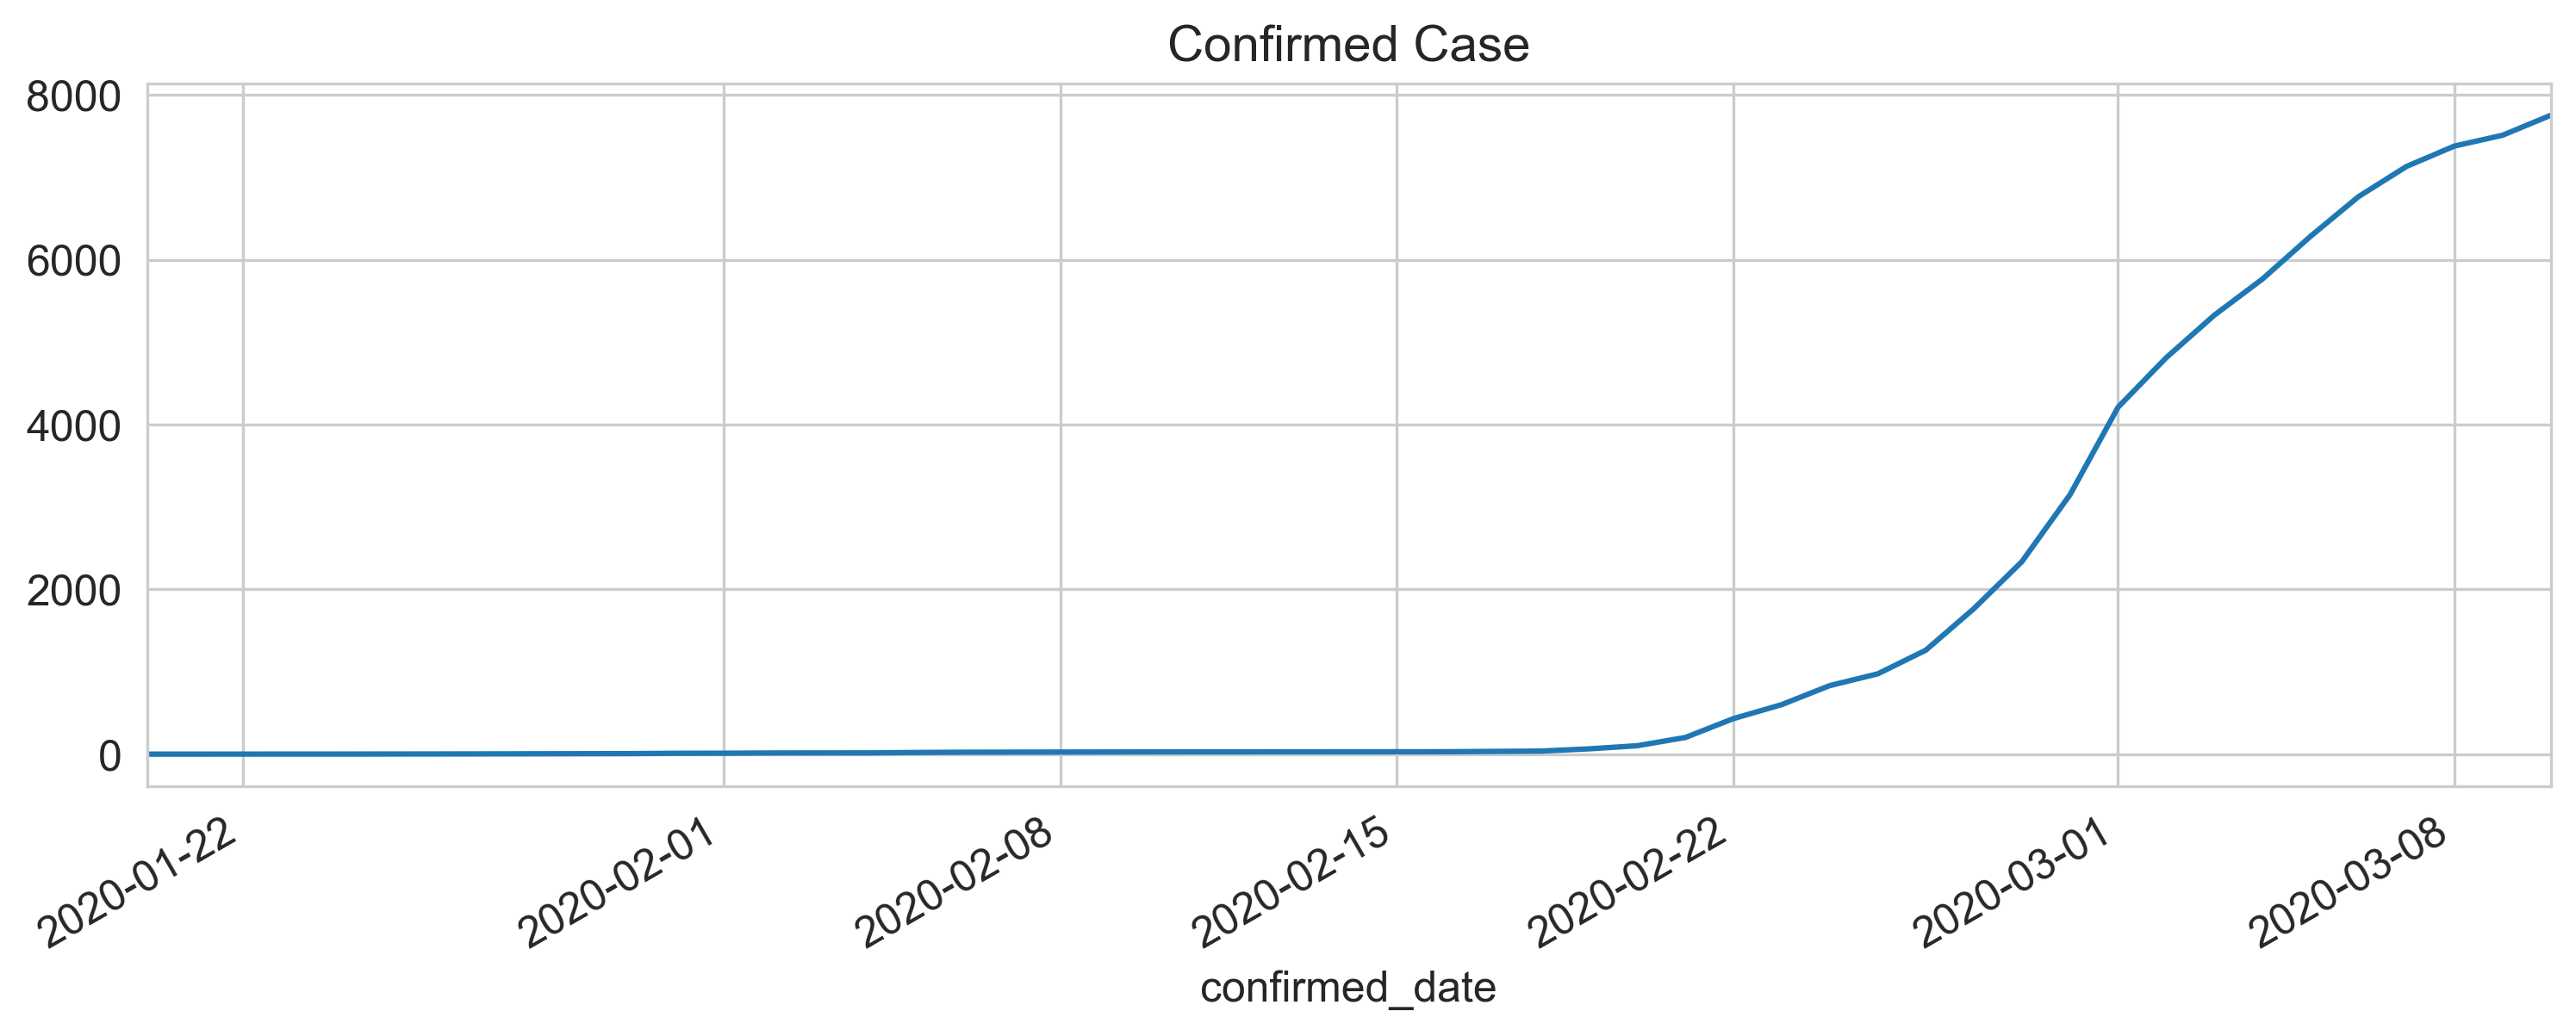

In [63]:
plt.figure(figsize=(12,4))
accumulated_count.plot()
plt.title('Confirmed Case')

In [64]:
data = count_id.resample('D').first().cumsum()
data = data [10:]

In [65]:
dataframe = pd.DataFrame(data)
dataframe.columns = ['Number of Confirmed']
dataframe

,Number of Confirmed
confirmed_date,
2020-01-30,7.0
2020-01-31,11.0
2020-02-01,12.0
2020-02-02,15.0
2020-02-03,NaN
2020-02-04,16.0
2020-02-05,21.0
2020-02-06,24.0
2020-02-07,NaN


In [66]:
data = count_id.resample('D').first().fillna(0).cumsum()
data = data [10:]

dataframe = pd.DataFrame(data)
dataframe.columns = ['Number of Confirmed']
dataframe

,Number of Confirmed
confirmed_date,
2020-01-30,7.0
2020-01-31,11.0
2020-02-01,12.0
2020-02-02,15.0
2020-02-03,15.0
2020-02-04,16.0
2020-02-05,21.0
2020-02-06,24.0
2020-02-07,24.0


In [67]:
dataframe.describe()

,Number of Confirmed
count,41.000000
mean,1832.439024
std,2712.634145
min,7.000000
25%,27.000000
50%,65.000000
75%,3149.000000
max,7754.000000


#### Check Target Variable Distribution

In [68]:
print(data.skew())

1.2175377672426486


In [69]:
data.describe() 

count      41.000000
mean     1832.439024
std      2712.634145
min         7.000000
25%        27.000000
50%        65.000000
75%      3149.000000
max      7754.000000
Name: patient_id, dtype: float64

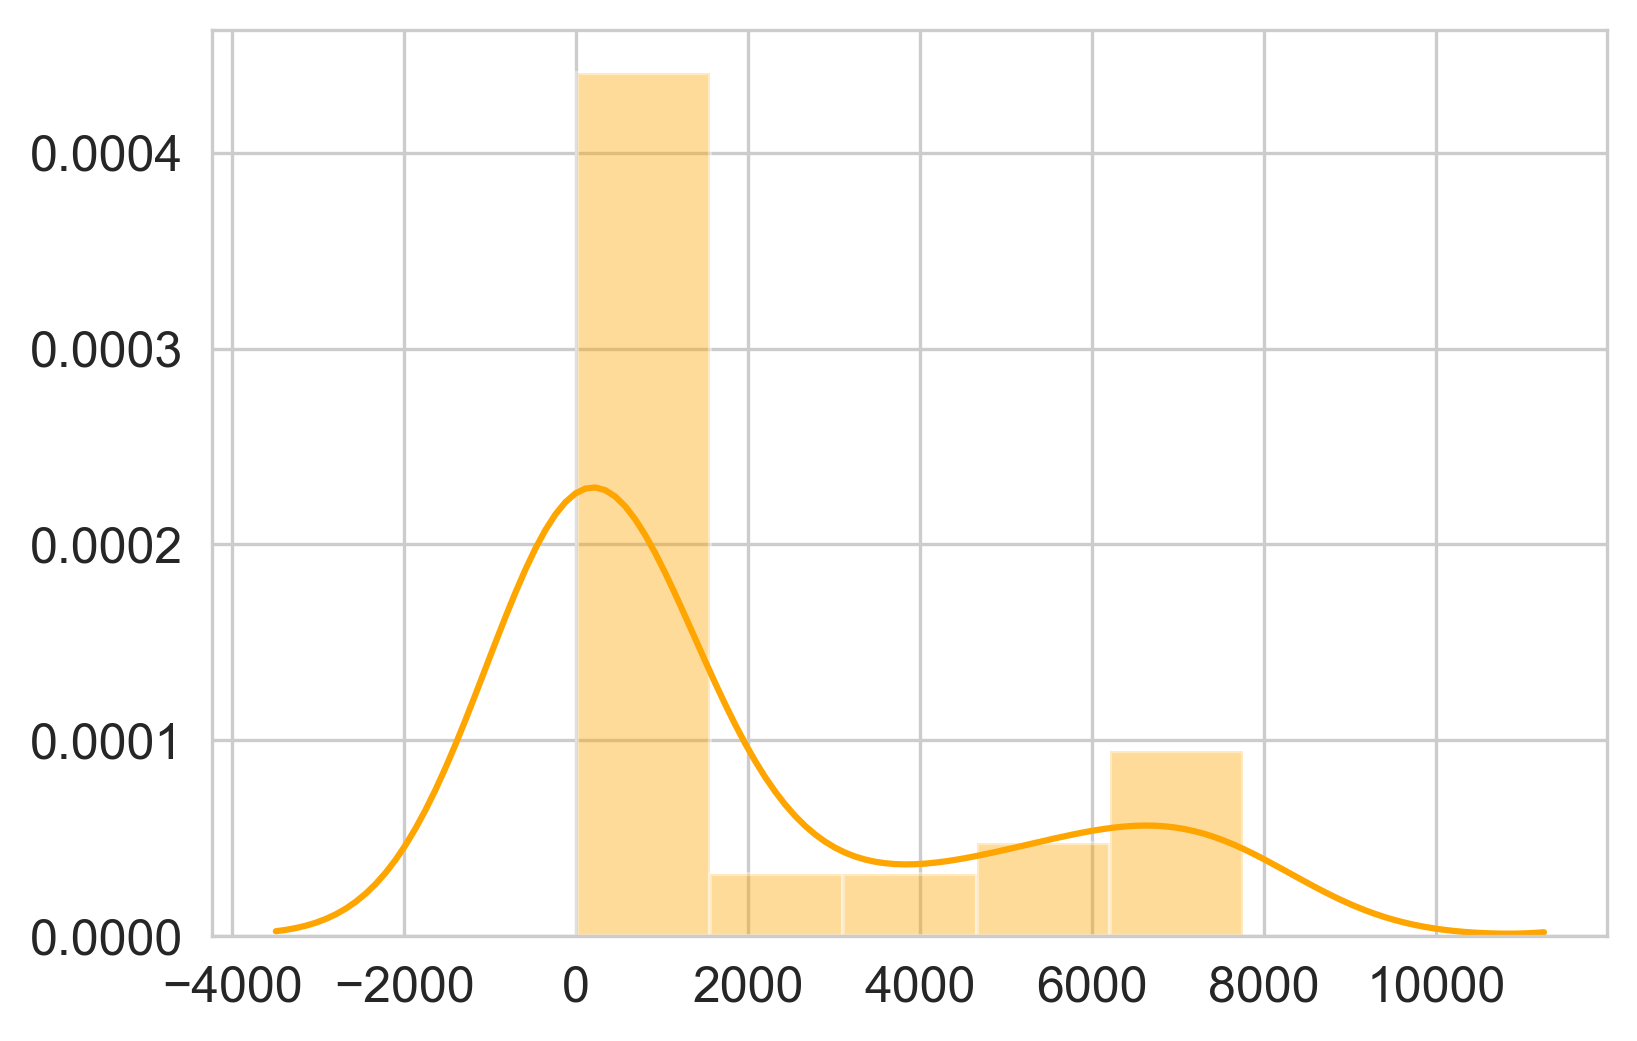

In [70]:
sns.distplot(dataframe, color="orange");

#### Log Transform

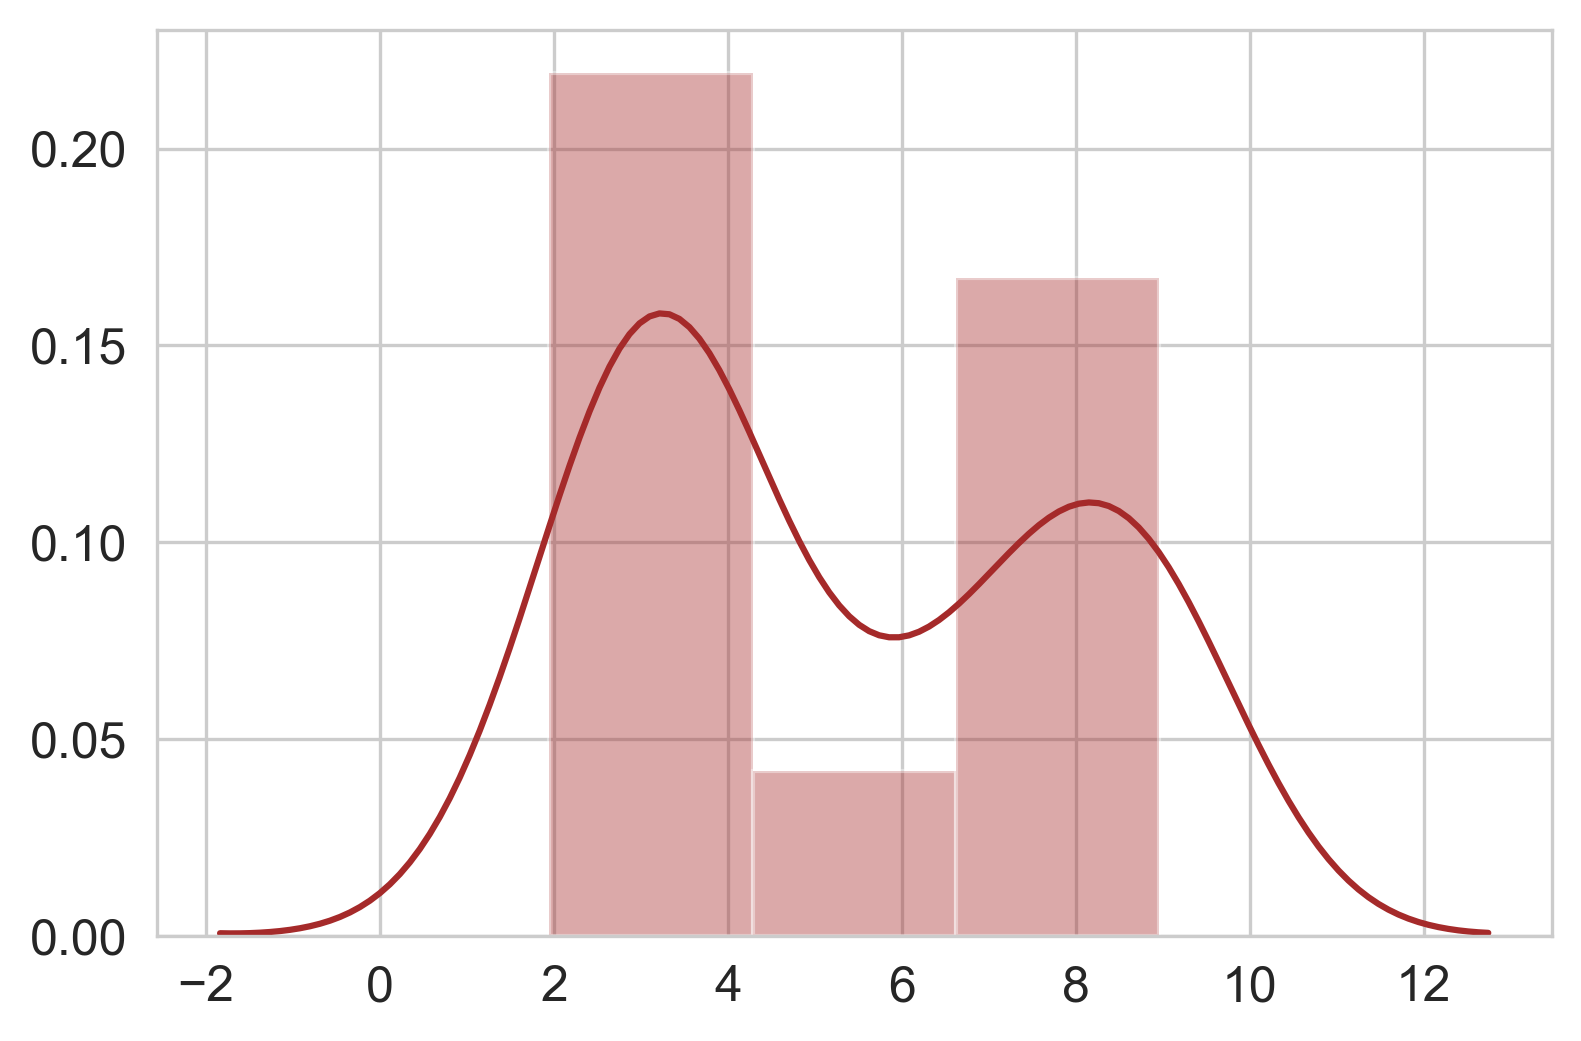

In [71]:
confirmed_date_transform = np.log(dataframe)
sns.distplot(confirmed_date_transform, color="brown");

In [72]:
print(confirmed_date_transform.skew())

Number of Confirmed    0.306221
dtype: float64


In [73]:
confirmed_date_transform.describe() 

,Number of Confirmed
count,41.000000
mean,5.347268
std,2.504474
min,1.945910
25%,3.295837
50%,4.174387
75%,8.054840
max,8.955964


#### Define variable x and y

In [74]:
x = np.arange(len(confirmed_date_transform)).reshape(-1,1)
y = confirmed_date_transform.values

In [75]:
x.shape

(41, 1)

In [76]:
y.shape

(41, 1)

#### Split the dataset into Training Set and Test Set (80/20)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [78]:
X_train

array([[30],
       [28],
       [20],
       [38],
       [ 2],
       [40],
       [18],
       [15],
       [22],
       [16],
       [37],
       [ 8],
       [13],
       [ 5],
       [17],
       [14],
       [34],
       [ 7],
       [33],
       [ 1],
       [26],
       [12],
       [32],
       [24],
       [ 6],
       [23],
       [21],
       [19],
       [ 9],
       [39],
       [ 3],
       [ 0]])

#### Modelling

In [79]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

linreg.score(X_train, Y_train)

0.9080424459986249